<a href="https://colab.research.google.com/github/marianabetancur18/Arrhytmia-prediction--Decision-Tree-and-Bayesian-classifier/blob/main/Arrhytmia_prediction_Decision_Tree_and_Bayesian_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias 

- Numpy: es una biblioteca de Python que se utiliza para trabajar con matrices. También tiene funciones para trabajar en el dominio de álgebra lineal, transformada de Fourier y matrices.

- Pandas: es una biblioteca de software escrita para el lenguaje de programación Python para la manipulación y el análisis de datos. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series de tiempo.

- Seaborn: es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.

- Scikit-learn: es probablemente la biblioteca más útil para el aprendizaje automático en Python. La biblioteca sklearn contiene muchas herramientas eficientes para el aprendizaje automático y el modelado estadístico que incluyen clasificación, regresión, agrupación en clústeres y reducción de dimensionalidad.

- Matplotlib. pyplot: es una colección de funciones que hacen que matplotlib funcione como MATLAB. Cada función de pyplot realiza algún cambio en una figura: por ejemplo, crea una figura, crea un área de trazado en una figura, traza algunas líneas en un área de trazado, decora la trama con etiquetas, etc.

- Subprocess: The subprocess module present in Python(both 2. ... x) is used to run new applications or programs through Python code by creating new processes.

## Integrantes:

- Mariana Betancur 
- Mateo Rincon
- Juan Jose Lopera

In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

## Importacion del archivo de estudio

Para este proyecto se tienen datos provenientes de arrhythmia.data

 **¿Qué es una arritmia?** 

Es un trastorno de la frecuencia cardíaca (pulso) o del ritmo cardíaco. El corazón puede latir demasiado rápido (taquicardia), demasiado lento (bradicardia) o de manera irregular.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving arrhytmia.data to arrhytmia.data


In [ ]:
data = pd.read_csv('arrhytmia.data', sep=",")
print(data)

     Age  Sex  Height  Weight  QRS duration  ...  V619  V620  V621  V622  Class
0     75    0     190      80            91  ...   0.9   2.9  23.3  49.4      8
1     56    1     165      64            81  ...   0.2   2.1  20.4  38.8      6
2     54    0     172      95           138  ...   0.3   3.4  12.3  49.0     10
3     55    0     175      94           100  ...   0.4   2.6  34.6  61.6      1
4     75    0     190      80            88  ...  -0.1   3.9  25.4  62.8      7
..   ...  ...     ...     ...           ...  ...   ...   ...   ...   ...    ...
447   53    1     160      70            80  ...   0.7   0.6  -4.4  -0.5      1
448   37    0     190      85           100  ...   0.4   2.4  38.0  62.4     10
449   36    0     166      68           108  ...   1.5   1.0 -44.2 -33.2      2
450   32    1     155      55            93  ...   0.5   2.4  25.0  46.6      1
451   78    1     160      70            79  ...   0.5   1.6  21.3  32.8      1

[452 rows x 280 columns]


## Análisis de features

El dataset multivariado ALEATORIO cuenta con 452 filas (personas) y 280 features (a primera vista se identifican variables categoricas, discretas y continuas), se indagara mas al respecto de los mismos:

1. Edad: edad en años
2. Sexo: Sexo (0 = masculino; 1 = femenino)
3. Altura: Altura en centímetros
4. Peso: peso en kilogramos
5. Duración del QRS: Promedio de la duración del QRS en mseg
6. Intervalo P-R: duración media entre el inicio de las ondas P y Q en msegLineal
7. Intervalo Q-T: duración media entre el inicio de Q y el desplazamiento de las ondas T en mseg
8. Intervalo T: duración media de la onda T en mseg
9. Intervalo P: duración media de la onda P en mse

Ángulos vectoriales en grados en el plano frontal de: QRS, T, P, QRST,J (10,11,12,13,14)

15. Frecuencia cardíaca: número de latidos cardíacos por minuto.

Del canal DI:
Anchura media, en mseg, De: Q wave,R wave,S wave R' wave, small peak just after R, S' wave(16,17,17,19,20).

21. Number of intrinsic deflections
22. Existencia de onda R irregular, nominal
23. Existencia de derivación difásica de la onda R, nominal
24. Existencia de onda P irregular, nominal
25. Existencia de derivación difásica de la onda P, nominal
26. Existencia de onda T irregular, nominal
27. Existencia de derivación difásica de la onda T, nominal

Del canal DII:
28 .. 39 
De los canales DIII:
40 .. 51
Del canal AVR:
52 .. 63
Del canal AVL:
64 .. 75
Del canal AVF:
76 .. 87
Del canal V1:
88 .. 99
Del canal V2:
100 .. 111
Del canal V3:
112 .. 123
Del canal V4:
124 .. 135
Del canal V5:
136 .. 147
Del canal V6:
148 .. 159

Del canal DI:
Amplitud, * 0,1 milivoltios, de
Onda 
160 JJ,
161 onda Q, 
162 onda R, 
163 onda S, 
164 onda R ', 
165 S 'onda, 
166 onda P, 
167 onda T, 

168. QRSA, Suma de áreas de todos los segmentos dividida por 10, (Área = ancho * alto / 2)
169. QRSTA = QRSA + 0.5 * ancho de la onda T * 0.1 * altura de la onda T. (Si T es difásico, entonces se considera el segmento más grande)

Del canal DII:
170 .. 179
Del canal DIII:
180 .. 189
Del canal AVR:
190 .. 199
Del canal AVL:
200 .. 209
Del canal AVF:
210 .. 219
Del canal V1:
220 .. 229
Del canal V2:
230 .. 239
Del canal V3:
240 .. 249
Del canal V4:
250 .. 259
Del canal V5:
260 .. 269
Del canal V6:
270 .. 279










##  Target

Tomaremos las features descritas anteriormente como variables predictoras y como target el feature class que dice si una persona tiene algun tipo de arritmia o si por el contrario esta normal.
Es decir se busca determinar la condicion de una persona con respecto a arritmias.

Al ser un dataset tan grande, se uso una descripcion estadistica de los mismos para tratar de detectar anomalias.

In [ ]:
data.describe()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate,Q wave,R wave,S wave,R' wave,S' wave,intrinsic deflections,ragged R wave,diphasic derivation of R wave,ragged P wave,diphasic derivation of P wave,ragged T wave,diphasic derivation of T wave,DII1,DII2,DII3,DII4,DII5,DII6,DII7,DII8,DII9,DII10,DII11,DII12,DIII1,...,V314,V315,V316,V317,V318,V319,V320,V321,V322,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V513,V514,V515,V516,V517,V518,V519,V520,V521,V522,V613,V614,V615,V616,V617,V618,V619,V620,V621,V622,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,444.000000,430.000000,451.000000,76.000000,451.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,36.150901,48.913953,36.716186,-13.592105,74.463415,5.628319,51.628319,20.920354,0.141593,0.0,30.035398,0.002212,0.011062,0.011062,0.004425,0.004425,0.008850,5.619469,54.336283,20.59292,0.433628,0.150442,31.637168,0.017699,0.028761,0.002212,0.004425,0.004425,0.015487,16.026549,...,-0.653540,8.039602,-10.150664,0.032965,-0.013496,0.226770,3.894690,-8.269027,32.422788,0.001106,-0.297566,11.839381,-7.034513,0.025664,-0.002876,0.547788,2.535841,10.081195,33.328540,-0.285398,-0.277212,11.369912,-3.607522,0.016814,0.0,0.546681,1.722124,17.840044,32.871460,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,57.858255,29.346409,36.020725,127.220248,13.870684,10.650001,18.249901,20.541728,1.569483,0.0,10.046393,0.047036,0.104708,0.104708,0.066445,0.066445,0.093759,11.220680,17.248213,21.06105,3.093161,2.692591,9.624951,0.132002,0.167319,0.047036,0.066445,0.066445,0.123615,21.906457,...,3.414085,5.279719,7.066568,0.390403,0.264398,0.548988,2.990809,32.157008,37.362289,1.015566,1.758544,5.917391,5.061472,0.166763,0.046287,0.426941,2.429776,25.074695,34.361665,0.675060,0.992472,4.793656,2.850633,0.275907,0.0,0.370548,1.708190,16.445472,24.421643,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,-170.000000,-135.000000,-179.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-32.900000,0.000000,-48.400000,0.000000,-5.600000,-3.100000,-11.800000,-242.400000,-146.200000,-3.200000,-20.400000,0.000000,-42.900000,0.000000,-0.900000,-2.600000,-8.200000,-124.800000,-161.400000,-4.800000,-14.200000,0.000000,-30.800000,0.000000,0.0,-0.900000,-5.000000,-56.800000,-63.600000,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,14.000000,41.000000,12.000000,-124.500000,65.000000,0.000000,40.000000,0.000000,0.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

1. los features T,P,QRST, J y Heart rate tienen datos faltantes.
De acuerdo con la informacion que se tenia del dataset, los datos faltantes estan identificados con '?', al importar el dataset estos pasan a ser "NaN".


In [ ]:
data.columns[(data == 0).all()]

Index(['S' wave', 'AVL5', 'AVL7', 'AVF9', 'V49', 'V410', 'V55', 'V57', 'V59',
       'V511', 'V65', 'V610', 'V611', 'DIS' wave', 'AVL18', 'V518', 'V618'],
      dtype='object')

2. Hay columnas que estan llenas de ceros como 'S' wave', 'AVL5', 'AVL7', 'AVF9', 'V49', 'V410', 'V55', 'V57', 'V59','V511', 'V65', 'V610', 'V611', 'DIS' wave', 'AVL18', 'V518', 'V618'. Estas seran eliminadas pues no aportan informacion al modelo.

In [ ]:
data_2=data.copy()
data_2=data_2.drop(columns=["S' wave", 'AVL5', 'AVL7', 'AVF9', 'V49', 'V410', 'V55', 'V57', 'V59',
       'V511', 'V65', 'V610', 'V611', "DIS' wave", 'AVL18', 'V518', 'V618'])

3. Consultado con un espcialista nos informo que hay variables en el dataset que no infuyen en el diagnostico de arritmias:

*   Estatura y peso, porque las variaciones electrocardigraficas para los desenlaces patologicos no varian con esta variable. Los criterios diagnosticos no son dependientes de estas 2 variables.
*  Q-T interval, porque ninguno de los desenlaces (resultados), tiene como criterio diagnostico conocer el tiempo de despolarizacion ventricular electrico.
* T interval y P interval, porque la duracion en mseg de las ondas T y P respectivamente no estan asociadas a ninguno de los resultados.
* QRS, T, P y QRST, porque los angulos en grados de ninguna de las ondas de manera aislada se consideran criterios diagnosticos para ninguno de los desenlaces.
* J, porque el angulo en grados del punto de manera aislada se considera criterio diagnostico para ninguno de los desenlaces.
* Intrinsic deflections, porque no se considera necesario para confirmar ni descartar ninguno de los diagnosticos.
* Ragged R wave, ragged P wave, ragged T wave, diphasic derivation of P wave y diphasic derivation of T wave, porque en la interpretacion medica de los electrocardiogramas no son consideradas como criterios diagnosticos.
* V5, V6, AVR y AVL, porque no son criterio diagnostico para conocer condiciones electrocardiograficas en las caras cardiacas anteriores ni inferiores.

Por tanto seran eliminadas del dataset.


In [ ]:
data_3=data_2.copy()
data_3=data_3.drop(columns=["Height", "Weight", "Q-T interval", 'T interval', 'P interval', 'QRS', 'T', 'P', 'QRST', 'J', 'intrinsic deflections', 'ragged R wave', 'ragged P wave', 'diphasic derivation of P wave', 'ragged T wave',
       'diphasic derivation of T wave','V51','V52','V53','V54','V56','V58','V510','V512','V513','V514','V515','V516','V517','V519','V520','V521','V522','V61','V62','V63','V64',
       'V66','V67','V68','V69','V612','V613','V614','V615','V616','V617','V619','V620','V621','V622','AVR1','AVR2','AVR3','AVR4','AVR5','AVR6','AVR7','AVR8','AVR9','AVR10','AVR11',
       'AVR12','AVR13','AVR14','AVR15','AVR16','AVR17','AVR18','AVR19','AVR20','AVR21','AVR22','AVL1','AVL2','AVL3','AVL4','AVL6','AVL8','AVL9','AVL10','AVL11','AVL12','AVL13',
       'AVL14','AVL15','AVL16','AVL17','AVL19','AVL20','AVL21','AVL22',])
data_3.describe()

,Age,Sex,QRS duration,P-R interval,Heart rate,Q wave,R wave,S wave,R' wave,diphasic derivation of R wave,DII1,DII2,DII3,DII4,DII5,DII6,DII7,DII8,DII9,DII10,DII11,DII12,DIII1,DIII2,DIII3,DIII4,DIII5,DIII6,DIII7,DIII8,DIII9,DIII10,DIII11,DIII12,AVF1,AVF2,AVF3,AVF4,AVF5,AVF6,...,V114,V115,V116,V117,V118,V119,V120,V121,V122,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,Class
count,452.000000,452.000000,452.000000,452.000000,451.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,88.920354,155.152655,74.463415,5.628319,51.628319,20.920354,0.141593,0.011062,5.619469,54.336283,20.59292,0.433628,0.150442,31.637168,0.017699,0.028761,0.002212,0.004425,0.004425,0.015487,16.026549,41.982301,20.327434,2.300885,0.318584,30.513274,0.002212,0.035398,0.002212,0.017699,0.011062,0.004425,7.477876,50.407080,19.796460,0.769912,0.221239,29.876106,...,-1.420133,1.633628,-6.554646,0.317699,-0.008850,-0.330531,0.176106,-18.738496,-15.881195,0.963938,-0.914381,3.977876,-9.048894,0.181416,-0.015929,0.001549,2.617920,-17.982743,10.245796,0.768142,-0.653540,8.039602,-10.150664,0.032965,-0.013496,0.226770,3.894690,-8.269027,32.422788,0.001106,-0.297566,11.839381,-7.034513,0.025664,-0.002876,0.547788,2.535841,10.081195,33.328540,3.880531
std,16.466631,0.497955,15.364394,44.842283,13.870684,10.650001,18.249901,20.541728,1.569483,0.104708,11.220680,17.248213,21.06105,3.093161,2.692591,9.624951,0.132002,0.167319,0.047036,0.066445,0.066445,0.123615,21.906457,23.106034,25.365424,9.212818,3.124229,18.359850,0.047036,0.184989,0.047036,0.132002,0.104708,0.066445,15.358883,20.207631,23.192498,4.675755,2.791290,13.028458,...,3.313584,2.226582,4.882572,1.490322,0.141457,0.574897,1.783182,23.715007,21.014088,1.177715,3.763854,3.346176,5.890044,0.971688,0.218366,0.492221,2.409711,25.659801,26.656455,1.444173,3.414085,5.279719,7.066568,0.390403,0.264398,0.548988,2.990809,32.157008,37.362289,1.015566,1.758544,5.917391,5.061472,0.166763,0.046287,0.426941,2.429776,25.074695,34.361665,4.407097
min,0.000000,0.000000,55.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-19.100000,0.000000,-37.800000,0.000000,-2.900000,-3.500000,-4.900000,-216.000000,-107.200000,-4.100000,-30.300000,0.000000,-43.300000,0.000000,-4.000000,-2.300000,-8.600000,-195.300000,-95.100000,-3.300000,-32.900000,0.000000,-48.400000,0.000000,-5.600000,-3.100000,-11.800000,-242.400000,-146.200000,-3.200000,-20.400000,0.000000,-42.900000,0.000000,-0.900000,-2.600000,-8.200000,-124.800000,-161.400000,1.000000
25%,36.000000,0.000000,80.000000,142.000000,65.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
data_4=data_3.copy()


Ahora se verificara que filas cuentan con NaN para cada feature con datos faltantes, esto se sabe por la fila count de la tabla anterior:

In [ ]:
data_4[data_4['Heart rate'].isna()]

,Age,Sex,QRS duration,P-R interval,Heart rate,Q wave,R wave,S wave,R' wave,diphasic derivation of R wave,DII1,DII2,DII3,DII4,DII5,DII6,DII7,DII8,DII9,DII10,DII11,DII12,DIII1,DIII2,DIII3,DIII4,DIII5,DIII6,DIII7,DIII8,DIII9,DIII10,DIII11,DIII12,AVF1,AVF2,AVF3,AVF4,AVF5,AVF6,...,V114,V115,V116,V117,V118,V119,V120,V121,V122,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,Class
4,75,0,88,181,NaN,0,48,40,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,36,0,0,0,60,0,0,0,0,0,0,44,0,0,0,0,0,...,-5.7,0.0,0.0,0.0,0.0,-0.4,-0.5,-25.0,-30.0,-0.2,0.0,1.6,-6.0,0.0,0.0,-0.7,2.1,-12.4,8.6,-0.5,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,7


Para el valor NaN de heart rate se sabe que esa persona tiene Ventricular Premature Contraction (PVC) (class 7), otras 2 personas en este dataset tienen la misma condicion, por tanto, se sacara el promedio de este feature de ambas y se le pondra al NaN.

In [ ]:
New_HR=data_4[data_4['Class']==7]['Heart rate'].mean()
data_4['Heart rate'][4]=New_HR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Selección de variables predictoras

El dataset luego de la depuracion con el experto sigue teniendo un numero muy grende de features, para estimar el numero de variables y cuales usaremos se utilizaran 2 algoritmos diferentes.

Primero encontraremos aquellas variables que tengan entre ellas una correlacion superior a 0.5

In [ ]:
correlations= data_4[data_4.columns].corr(method ='pearson')
col_name = data_4.columns
dictionary = {}
for i in range(len(correlations)) :
  for j in data_4.columns[0:i]:
    if correlations[j][i] > 0.5:
       if j in dictionary:
         dictionary[j].append(col_name[i])
       else:
         dictionary[j]=[]
         dictionary[j].append(col_name[i])
dictionary 

{'AVF15': ['AVF21', 'AVF22'],
 'AVF16': ['AVF21'],
 'AVF2': ['DII21', 'DIII21', 'AVF21', 'AVF22'],
 'AVF20': ['AVF22'],
 'AVF21': ['AVF22'],
 'AVF4': ['AVF17'],
 'DII1': ['DII6', 'AVF1'],
 'DII13': ['AVF13'],
 'DII14': ['AVF14'],
 'DII15': ['DII21',
  'DII22',
  'DIII15',
  'DIII21',
  'DIII22',
  'AVF15',
  'AVF21',
  'AVF22'],
 'DII16': ['DII21', 'DIII16', 'AVF16', 'AVF21'],
 'DII17': ['DIII17', 'AVF17'],
 'DII19': ['DIII19', 'AVF19'],
 'DII2': ['AVF2', 'DII21'],
 'DII20': ['DII22', 'DIII20', 'AVF20'],
 'DII21': ['DII22',
  'DIII15',
  'DIII21',
  'DIII22',
  'AVF15',
  'AVF16',
  'AVF21',
  'AVF22'],
 'DII22': ['DIII21', 'DIII22', 'AVF15', 'AVF20', 'AVF21', 'AVF22', 'V422'],
 'DII3': ['DIII3', 'AVF3'],
 'DII4': ['DII17'],
 'DII6': ['AVF6'],
 'DIII12': ['DII17', 'DIII17', 'AVF17'],
 'DIII13': ['AVF13'],
 'DIII14': ['AVF14'],
 'DIII15': ['DIII21', 'DIII22', 'AVF15', 'AVF21', 'AVF22'],
 'DIII16': ['DIII21', 'AVF16', 'AVF21'],
 'DIII17': ['AVF17'],
 'DIII19': ['AVF19'],
 'DIII2': ['DIII

In [ ]:
dr = [] #atributos que por correlacion, seran eliminados
for key, values in dictionary.items():
  for i in values:
    corr = data_4[[key, i, "Class"]].corr(method = 'pearson')
    if corr[key][2] >= corr[i][2]:
      dr.append(i)
    else:
     dr.append(key)
     break

dr = list(dict.fromkeys(dr))
len(dr)

84

Analizando las variables con un experto, tiene sentido que tengan una correlacion moderada-alta pues son medidas de canales del corazon que se relacionan entre ellas.
Al ser un modelo con tantas variables, se decidio que de un par de variables con alta correlacion se eliminaria aquella que menos este correlacionada con la variable objetivo (target).

In [ ]:
data_5=data_4.copy()
data_5=data_5.drop(columns=dr)
data_5

,Age,Sex,QRS duration,P-R interval,Heart rate,Q wave,S wave,diphasic derivation of R wave,DII2,DII3,DII5,DII7,DII8,DII9,DII10,DII11,DII12,DIII1,DIII4,DIII5,DIII7,DIII8,DIII9,DIII10,DIII11,AVF1,AVF5,AVF6,AVF7,AVF8,AVF10,AVF11,AVF12,V14,V15,V17,V18,V19,V110,V111,...,V211,V212,V37,V38,V39,V311,V312,V42,V45,V47,V48,V411,V412,DIQ wave,DIR' wave,DIP wave,DII13,DII14,DII18,DIII13,DIII14,DIII15,DIII18,DIII19,DIII20,AVF17,AVF18,V114,V115,V116,V118,V122,V313,V318,V319,V415,V417,V418,V419,Class
0,75,0,91,193,63.0,0,44,0,44,20,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,48,0,56,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,52,0,0,0,0,0,0.0,0.0,0.6,0.0,0.0,0.0,0.1,-5.2,1.4,0.0,0.8,-0.6,0.0,0.0,-6.0,0.0,0.0,0.0,-29.7,-0.1,0.0,0.6,15.2,0.0,0.0,0.9,8
1,56,1,81,174,53.0,0,0,0,64,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,48,0,0,0,0,0,0.0,0.0,0.4,0.0,0.0,0.0,0.3,-1.6,0.9,0.0,-0.3,0.4,0.0,0.0,0.0,1.0,-8.8,0.0,-26.8,0.0,0.0,0.9,9.5,0.0,0.0,0.5,6
2,54,0,138,163,75.0,0,80,0,56,52,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,24,0,1,0,0,0,76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,44,0,0,0,0,0,0.0,0.0,0.3,0.8,-0.4,0.0,-0.2,-0.6,4.4,0.0,0.5,0.2,0.0,0.0,0.0,0.7,-3.8,0.0,-13.6,0.0,-0.5,0.4,10.0,0.0,0.0,0.5,10
3,55,0,100,202,71.0,0,20,0,64,36,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,56,0,0,0,0,0,0.0,0.0,1.1,0.1,0.0,0.0,-0.4,-0.4,1.6,0.0,-1.0,-0.9,0.0,0.0,-6.5,0.0,0.0,0.0,-22.4,0.7,0.0,0.1,15.0,0.0,0.0,0.1,1
4,75,0,88,181,74.5,0,40,0,40,24,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,48,0,0,0,0,0,0.0,0.0,0.9,0.1,0.0,0.0,0.2,-3.8,1.2,0.0,1.0,-0.6,0.0,0.0,-5.7,0.0,0.0,0.0,-30.0,-0.5,0.0,-1.0,15.2,0.0,0.0,-0.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,80,199,63.0,0,24,0,44,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,32,0,0,0,0,0,0.0,0.0,0.8,0.1,0.0,0.0,0.1,0.0,0.5,0.0,0.3,-0.4,0.0,0.0,-6.2,0.0,0.0,0.0,-19.7,1.0,0.0,-0.1,2.9,0.0,0.0,0.8,1
448,37,0,100,137,73.0,0,36,0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,64,0,0,0,0,0,0.0,0.0,0.7,0.8,0.0,0.0,0.7,0.0,7.8,0.0,0.3,1.6,0.0,0.0,-4.5,2.6,0.0,0.0,21.2,1.0,0.0,-0.3,22.5,0.9,0.0,0.7,10
449,36,0,108,176,84.0,16,40,0,40,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,44,28,0,0,0,0,0,...,0,0,0,0,0,0,0,52,0,0,0,0,0,-0.4,0.0,1.3,1.4,0.0,0.0,1.2,0.0,1.5,0.0,-2.8,-1.8,0.0,0.0,0.0,0.5,-1.4,-2.9,-0.9,-0.7,0.0,1.4,20.6,0.0,0.0,1.0,2
450,32,1,93,106,80.0,0,0,0,64,0,0,0,0,0,0,0,0,16,0,0,0,1,0,0,0,12,0,36,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,52,0,0,0,0,0,0.0,0.0,0.7,0.8,-0.5,0.0,1.2,-0.9,4.2,0.0,-1.1,0.2,0.0,0.0,0.0,2.2,-12.2,0.0,-16.3,2.2,0.0,0.9,11.9,0.0,0.0,0.6,1


## Grafica de correlaciones de Pearson

Como se explico anteriormente se eliminaron variables debido a su alta correlacion con respecto a otras, se espera que en modelo solo queden variables con una correlacion entre ellas menor a 0.5 es decir una correlacion baja.
Se quitaran los numeros de la grafica pues estos no se veian correctamente debido a la cantidad de variables.

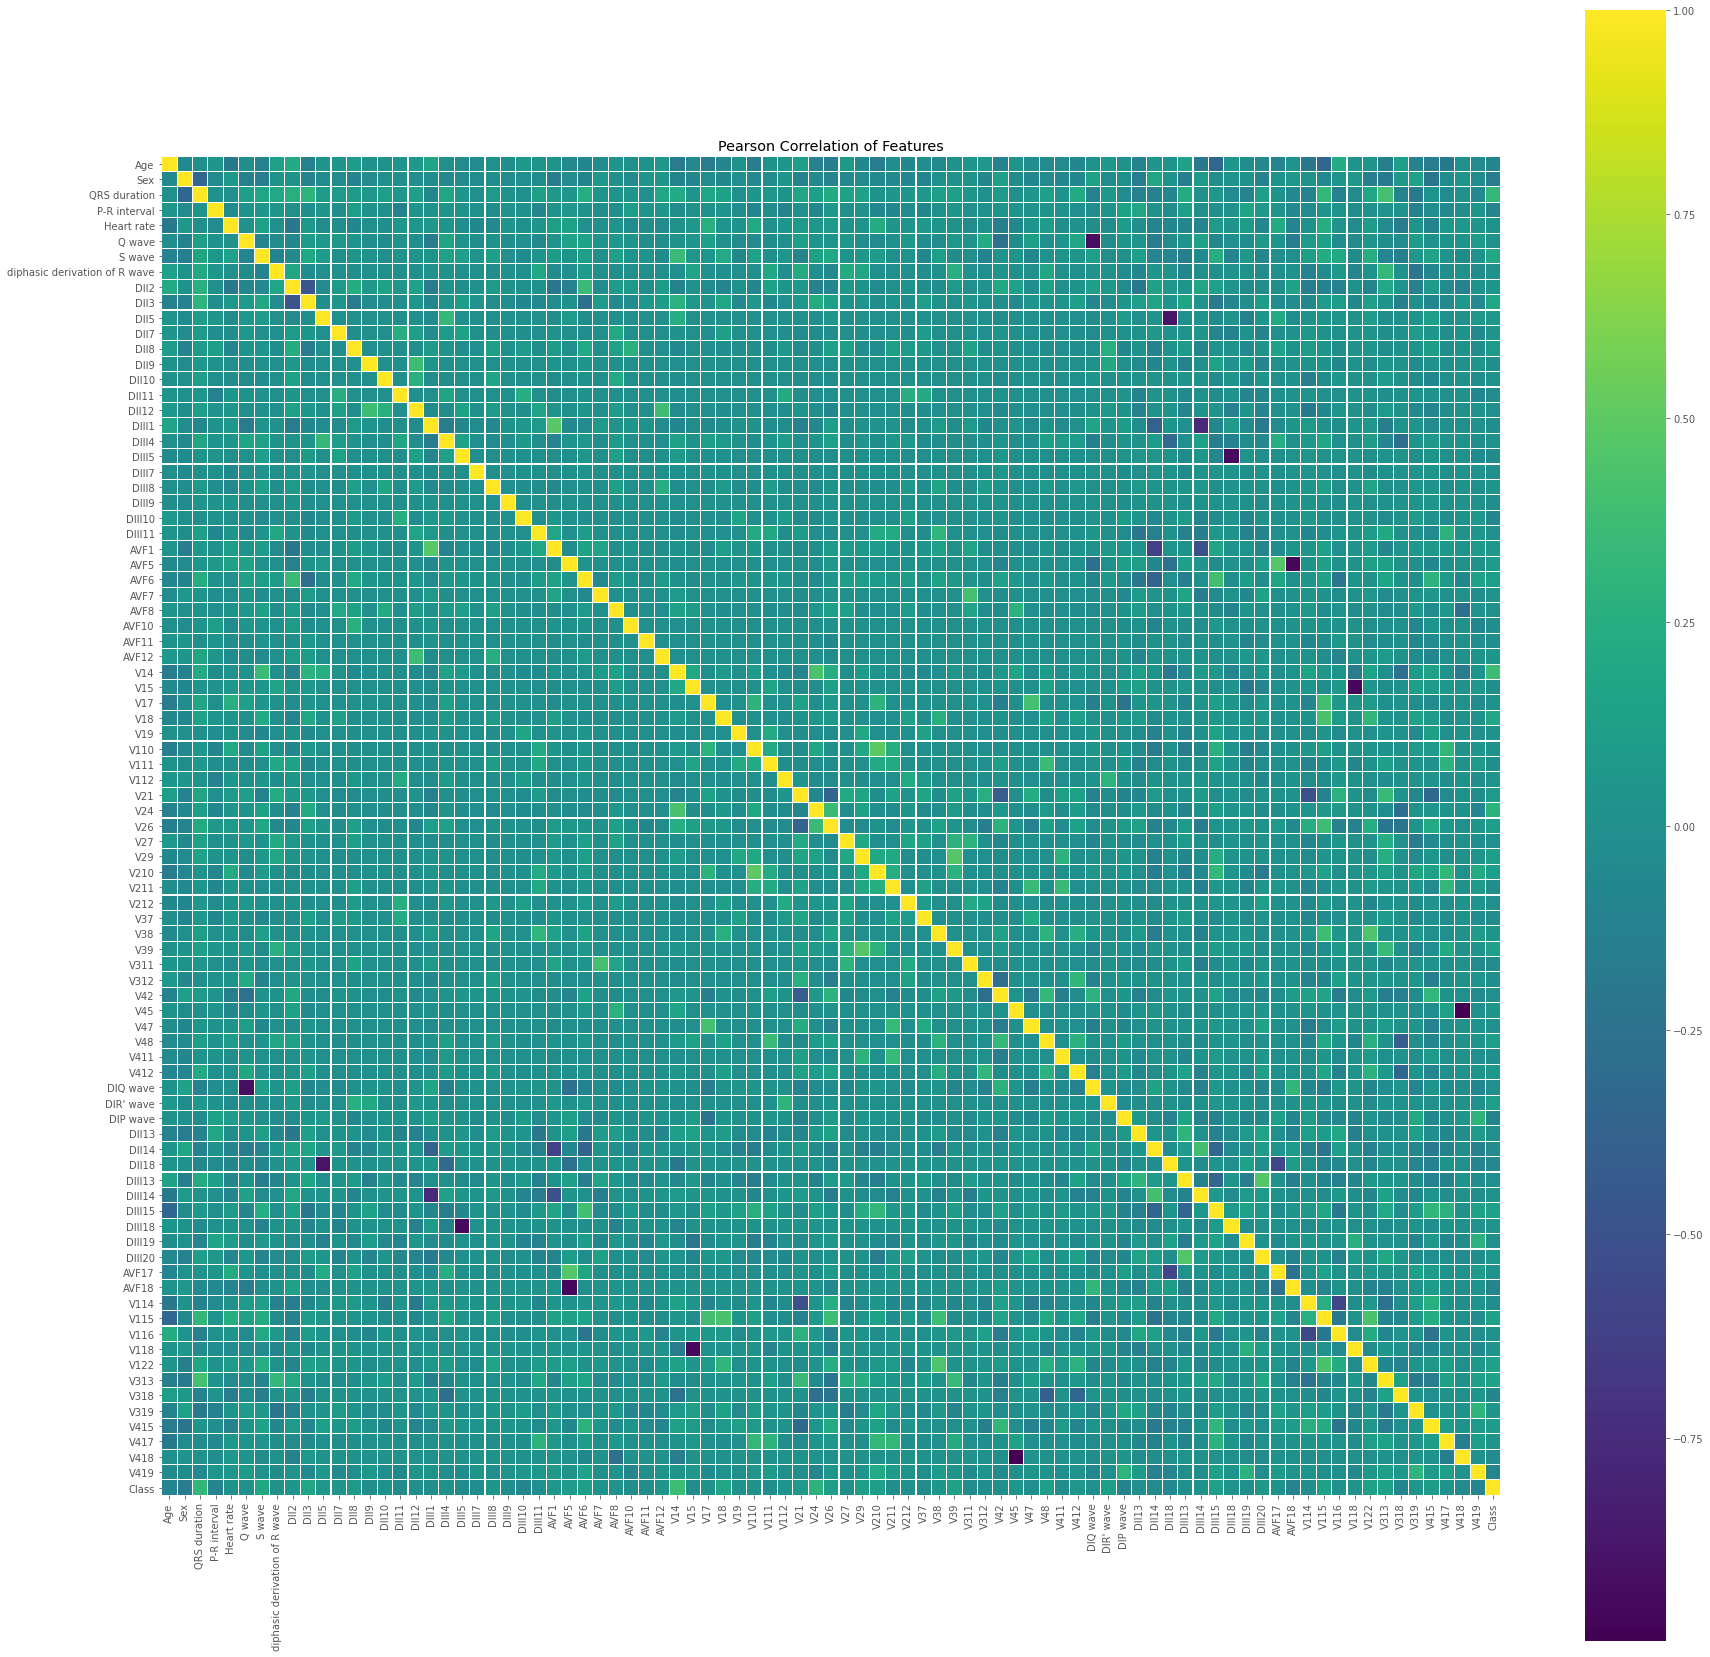

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features')
sb.heatmap(data_5.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=False,
           linewidths=0.1,
           linecolor='white',
           square=True)

Hay muchas variables aun, pero debido a la cantidad de habia inicialmente se plantearan modelos con las variables que se tienen en este momento y otro modelo que emplea otro algortimo para reducirlas aun mas.

## NOTA
En todos los modelos de DT que realizamos, hicimos uso del Indice de Gini para la creacion de puntos de particion y la formacion del arbol desde el nodo raiz, debido a que soporta el uso de variables continuas, y para nuestro dataset, en donde se habla de ondas, msegundos y medidas tan puntuales, se debe de tener este soporte para evitar la mala lectura de las variables y sus valores.
Ademas, nos parece que el indice de Gini le da un buen uso a las probabilidad para encontrar el valor mas pequeño y asi poder realizar la particion binaria de una manera mas efectiva.

## Propuesta de Modelo 1


Para este primer modelo, la idea fue poder realizar un diagnostico a los pacientes, para saber si estos presentaban condiciones normales, o padecer algun tipo de arritmia. En consencuencia, reemplazamos los valores en la columna clase que diferenciaban los tipos de arritmia, y las agrupamos, haciendo asi que en la columna "Class" aquellos pacientes con arritmia seran distinguidos por el numero "0", y los pacientes normales por el "1".

In [ ]:
for i in data_5.index:
  if data_5.at[i, "Class"] != 1:
    data_5.at[i, "Class"] = 0

data_5['Class']

0      0
1      0
2      0
3      1
4      0
      ..
447    1
448    0
449    0
450    1
451    1
Name: Class, Length: 452, dtype: int64

## Definir tamaño de datos de entrenamiento y datos de prueba

Para definir que porcentaje de datos se destinan entre cada area es necesario tener en cuenta que no sean lo suficientemente pocos para que el modelo no se ajuste a el (underfitting) o lo suficientemente grandes para que el este modelo practicamente recuerde los datos que se le dan y se sobreajuste a estos (overfitting). En ambos casos las predicciones no serian del todo acertadas y por eso es necesario encontrar un balance en los porcentajes destinados a cada area, esto se hizo cambiando manualmente el tamaño de la variable test_size hasta que el promedio de exactitud que se encuentra un poco mas abajo se maximizara. Y de esta manera encontramos que el porcentaje correcto es 75% de los datos destinarlos a entrenamiento y el 25% restante para probrar nuestro modelo.

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(data_5.loc[:, data_5.columns != 'Class'], data_5['Class'],test_size=0.25, random_state=0)

# Profundidad del árbol según número de atributos (variables)
Para escoger los hyperparametros se tuvo que cambiar manualmente cada uno de ellos y revisar con cuales el modelo conseguia una mayor exactitud. Si el numero de estos era muy bajo nos arriesgamos a tener un problema de overfitting en el cual el modelo se sobreajusta a los datos, y teniendo malos resultados al momento de predecir.

### Escoger n_splits
se refiere al número de grupos en los que se dividirá una muestra de datos determinada. Como tal, el procedimiento a menudo se denomina validación cruzada de k veces.

Para determinar el numero de n_splits se puede tener tres enfoques :

Representativo: el valor de k se elige de manera que cada grupo de pruebas / tren de muestras de datos sea lo suficientemente grande como para ser estadísticamente representativo del conjunto de datos más amplio.

k = 10: El valor de k se fija en 10, un valor que se ha encontrado mediante experimentación que generalmente da como resultado una estimación de la habilidad del modelo con un sesgo bajo y una varianza modesta.

k = n: el valor de k se fija, donde n es el tamaño del conjunto de datos para dar a cada muestra de prueba la oportunidad de ser utilizada en el conjunto de datos de reserva.

Por conveniencia escogemos el valor de n_splits = 20, ya que con este numero se alcanzo el mayor promedio de accuracy o exactitud en los resultados, de igual manera se hizo pruebas variando este numero y en la mayoria dio "6" como resultado optimo de profundidad de el arbol


### Escoger min_samples_split
Es el número mínimo de muestras necesarias para dividir un nodo. Si este parámetro se establece en 20 y si un nodo incluye muestras de menos de 20, significa que este es el último nodo (lo que significa nodo terminal u hoja) y ya no se puede dividir.

Lo que nos arroja que el numero minimo de min_samples_split para alcanzar el maximo de exactitud es 60

In [ ]:
from sklearn.tree import DecisionTreeClassifier
c_parameter_name = 'min_samples_split'
c_parameter_values = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100,110,120]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = DecisionTreeClassifier(min_samples_split=input_parameter, random_state=21)
    model.fit(X_train2, Y_train2)
    y_pred2 = model.predict(X_test2)
    
    acc_score = accuracy_score(Y_test2,y_pred2)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)


    min_samples_split   accuracy
0                 2.0  73.451327
1                 3.0  72.566372
2                 4.0  71.681416
3                 5.0  71.681416
4                 6.0  73.451327
5                 7.0  73.451327
6                 8.0  73.451327
7                 9.0  73.451327
8                10.0  73.451327
9                15.0  74.336283
10               20.0  74.336283
11               25.0  75.221239
12               30.0  75.221239
13               35.0  75.221239
14               40.0  75.221239
15               45.0  75.221239
16               50.0  75.221239
17               60.0  77.876106
18               70.0  77.876106
19               80.0  77.876106
20               90.0  77.876106
21              100.0  77.876106
22              110.0  77.876106
23              120.0  77.876106


### Escoger min_samples_leaf
El parámetro min_samples_leaf verifica antes de que se genere un nodo hoja, si la posible división del nodo padre da como resultado nodos hojas con este numero como minima cantidad de muestras, si no es asi no es posible hacer la division del nodo padre y este se convertira en un nodo hoja.

Lo que nos arroja que el numero minimo de min_samples_leaf para alcanzar el maximo de exactitud es 7

In [ ]:
c_parameter_name = 'min_samples_leaf'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = DecisionTreeClassifier(min_samples_leaf=input_parameter, random_state=21)
    model.fit(X_train2, Y_train2)
    y_pred2 = model.predict(X_test2)
    
    acc_score = accuracy_score(Y_test2,y_pred2)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)

    min_samples_leaf   accuracy
0                1.0  73.451327
1                2.0  72.566372
2                3.0  71.681416
3                4.0  75.221239
4                5.0  77.876106
5                6.0  73.451327
6                7.0  79.646018
7                8.0  76.991150
8                9.0  76.106195
9               10.0  75.221239
10              15.0  67.256637
11              20.0  68.141593
12              25.0  67.256637
13              30.0  68.141593
14              35.0  66.371681
15              40.0  60.176991
16              45.0  60.176991
17              50.0  60.176991


In [ ]:
from sklearn.metrics import precision_score
cv2 = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies2 = list()
max_attributes2 = len(list(data_5))
depth_range2 = range(1, max_attributes2 + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range2:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='gini', #entropy
                                             min_samples_split=60,
                                             min_samples_leaf=7,
                                             max_depth = depth,
                                             class_weight={0:1.18, 1:1}) #1.18 es el peso de la categoria "Arrhythmia", resultado de dividir 245 (Casos Normales)/207 (Casos de algun tipo de arritmia)
                                                                   
    for train_fold, valid_fold in cv2.split(data_5):
        f_train = data_5.loc[train_fold] 
        f_valid = data_5.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['Class'], axis=1), 
                               y = f_train["Class"]) 
        #valid_acc = model.score(X = f_valid.drop(['Class'], axis=1), 
                                #y = f_valid["Class"]) # calculamos la exactitud con el segmento de validacion
        #fold_accuracy.append(valid_acc)

        prediction = model.predict(f_valid.drop(['Class'], axis=1))
        otro=  precision_score(f_valid["Class"], prediction)
        fold_accuracy.append(otro)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies2.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range2, "Average Precision": accuracies2})
dataframe = dataframe[["Max Depth", "Average Precision"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Precision
         1           0.650560
         2           0.665743
         3           0.686801
         4           0.702674
         5           0.719282
         6           0.747904
         7           0.749035
         8           0.749035
         9           0.749035
        10           0.749035
        11           0.752671
        12           0.749035
        13           0.749035
        14           0.752671
        15           0.752671
        16           0.749035
        17           0.749035
        18           0.749035
        19           0.749035
        20           0.752671
        21           0.752671
        22           0.752671
        23           0.749035
        24           0.749035
        25           0.749035
        26           0.752671
        27           0.749035
        28           0.749035
        29           0.752671
        30           0.749035
        31           0.749035
        32           0.749035
        33

In [ ]:
from sklearn.metrics import precision_score
cv2 = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies2 = list()
max_attributes2 = len(list(data_5))
depth_range2 = range(1, max_attributes2 + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range2:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy', #entropy
                                             min_samples_split=60,
                                             min_samples_leaf=7,
                                             max_depth = depth,
                                             class_weight={0:1.18, 1:1}) #1.18 es el peso de la categoria "Arrhythmia", resultado de dividir 245 (Casos Normales)/207 (Casos de algun tipo de arritmia)
                                                                   
    for train_fold, valid_fold in cv2.split(data_5):
        f_train = data_5.loc[train_fold] 
        f_valid = data_5.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['Class'], axis=1), 
                               y = f_train["Class"]) 
        #valid_acc = model.score(X = f_valid.drop(['Class'], axis=1), 
                                #y = f_valid["Class"]) # calculamos la exactitud con el segmento de validacion
        #fold_accuracy.append(valid_acc)

        prediction = model.predict(f_valid.drop(['Class'], axis=1))
        otro=  precision_score(f_valid["Class"], prediction)
        fold_accuracy.append(otro)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies2.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range2, "Average Precision": accuracies2})
dataframe = dataframe[["Max Depth", "Average Precision"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Precision
         1           0.648660
         2           0.664235
         3           0.704869
         4           0.714175
         5           0.726961
         6           0.760020
         7           0.763259
         8           0.763259
         9           0.764758
        10           0.766346
        11           0.766346
        12           0.764209
        13           0.762709
        14           0.762709
        15           0.764209
        16           0.764209
        17           0.764209
        18           0.762709
        19           0.766346
        20           0.762709
        21           0.764209
        22           0.762709
        23           0.764209
        24           0.760572
        25           0.764209
        26           0.762709
        27           0.762709
        28           0.760572
        29           0.766346
        30           0.760572
        31           0.762709
        32           0.764209
        33

Luego de mirar los resultados de los diferentes "depth" (profundidades del arbol) con ambos criterios (gini y entropia), Entropia tenia un comportamiento muy disperso con profundidades similares, aunque tuviera porcentajes un poco mas altos que gini no son precisos para datos continuos, mientras que gini tiene mayor concordancia y presenta valores mas puntuales, por tanto se escogera este parametro

Se inicializa el arbol y se pasa a entrenarlo

In [ ]:
clf2 = DecisionTreeClassifier(max_depth = 7,min_samples_split=60,min_samples_leaf=7,
                             random_state = 0)

In [ ]:
clf2.fit(X_train2, Y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
score = clf2.score(X_test2, Y_test2)
print(score)

0.7787610619469026


In [ ]:
importances2 = pd.DataFrame({'feature':X_train2.columns,'importance':np.round(clf2.feature_importances_,4)})
importances2 = importances2.sort_values('importance',ascending=False)
importances2

,feature,importance
4,Heart rate,0.3243
2,QRS duration,0.2532
33,V14,0.1289
78,V122,0.0974
41,V21,0.0865
...,...,...
29,AVF8,0.0000
28,AVF7,0.0000
27,AVF6,0.0000
26,AVF5,0.0000


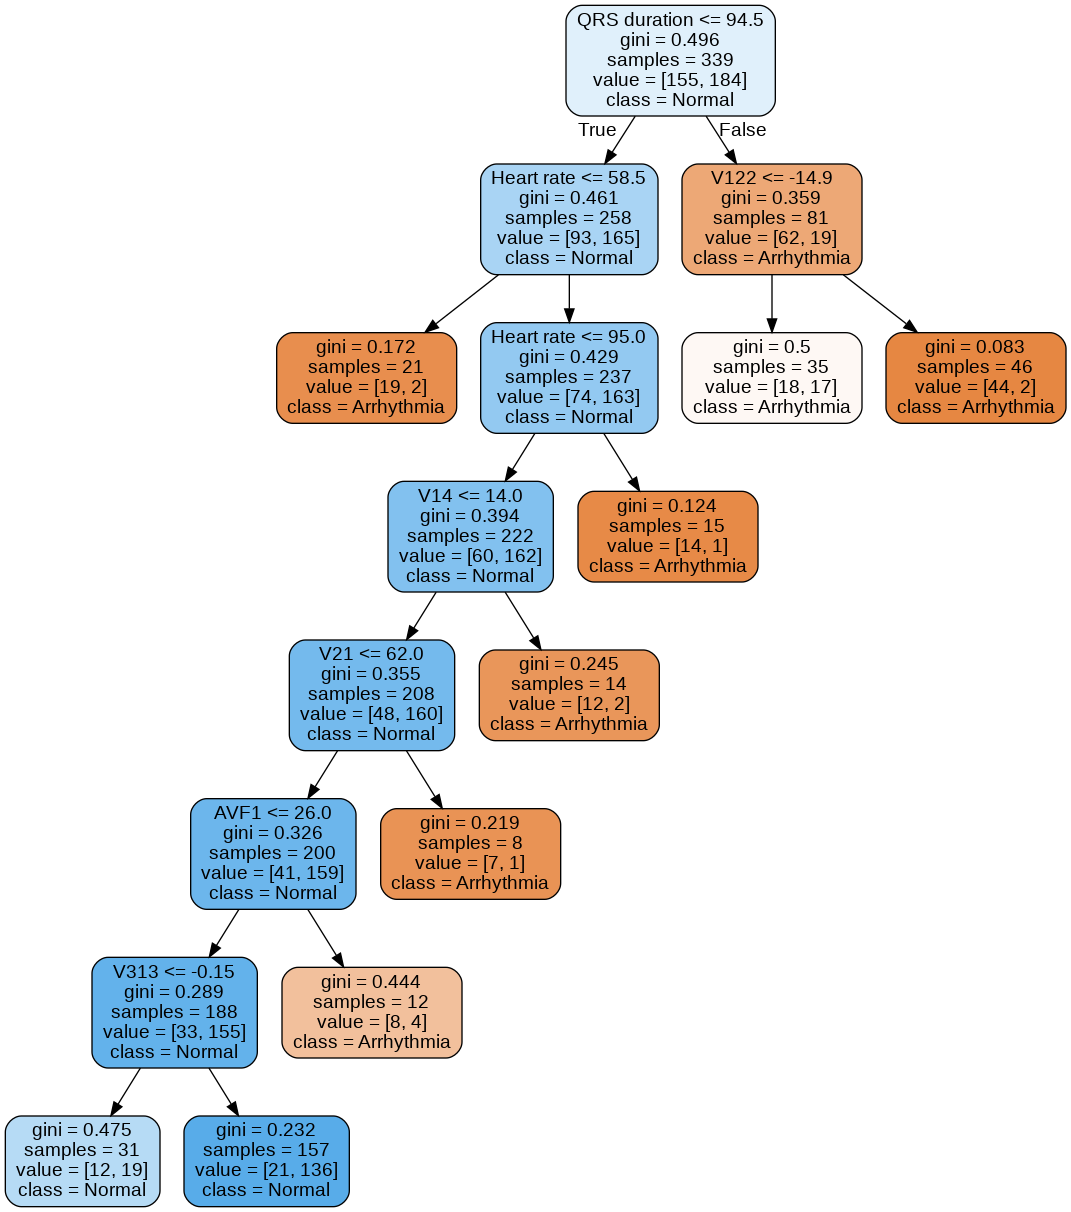

In [ ]:
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f2:
     f2 = tree.export_graphviz(clf2,
                              out_file=f2,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(data_5.drop(['Class'], axis=1)),
                              class_names = ['Arrhythmia', 'Normal'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

## Métrica de Exactitud en Entrenamiento (train)

In [ ]:
acc_decision_tree = round(clf2.score(X_train2, Y_train2) * 100, 2)
print(acc_decision_tree,'%')

81.71 %


## Matriz de confusión del Árbol de Decisión en Entrenamiento'

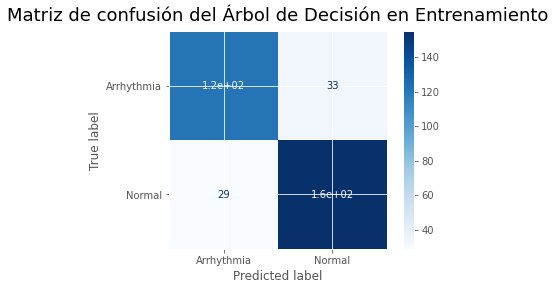

In [ ]:
disp = plot_confusion_matrix(clf2, X_train2, Y_train2,
                                 display_labels=['Arrhythmia', 'Normal'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol de Decisión en Entrenamiento', y=1.02, size=18)

plt.show()

##Métrica de Exactitud en Validación (test)

In [ ]:
acc_decision_tree = round(clf2.score(X_test2, Y_test2) * 100, 2)
print(acc_decision_tree,'%')

77.88 %


## Matriz de confusión del Árbol de Decisión en validacion

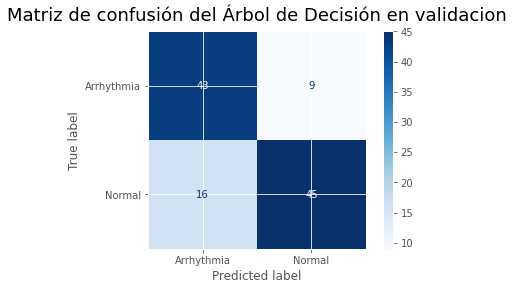

In [ ]:
disp = plot_confusion_matrix(clf2, X_test2, Y_test2,
                                 display_labels=['Arrhythmia', 'Normal'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol de Decisión en validacion', y=1.02, size=18)

plt.show()

Luego de los resultados anteriores podemos ver como, para el entrenamiento, donde la exactitud es de un 81.71% para el arbol, la matriz de confusion nos da que la efectividad fue de 81.87%, lo cual es relativamente alto. 
Para el caso de la validacion la exactitud es de 77.88%, y la matriz de confusion nos da 77.88% de efectividad al predecir los resultados.
En conclusion, la eficiencia del arbol en entrenamiento en validacion, nos dan unos porcentajes de aciertos bastante altos para una cantidad de registros tan limitada (452).

# Casos de uso


1.   Se tomo el registro numero 223 del dataset, escogido de manera aleatoria



In [ ]:
data.iloc[[223]][['QRS duration', 'Heart rate', 'V122', 'V14', 'V21', 'AVF1', 'Class']]

,QRS duration,Heart rate,V122,V14,V21,AVF1,Class
223,84,84.0,-14.7,0,0,0,1


Pasando por el arbol de clasificacion llegamos a que este predice que es una persona normal, un resultado falso negativo en la matriz de confusion

2.   Se tomo el registro numero 29 del dataset, escogido de manera aleatoria



In [ ]:
data.iloc[[29]][['QRS duration', 'Heart rate', 'V122', 'V14', 'V21', 'AVF1', 'Class']]

,QRS duration,Heart rate,V122,V14,V21,AVF1,Class
29,96,71.0,-5.7,0,0,88,2


Pasando por el arbol de clasificacion llegamos a que este predice que es una persona con arritmia, un resultado verdadero positivo en la matriz de confusion

# Propuesta de modelo 2

Para este modelo vamos a reducir el numero de variables predictoras con el algoritmo SelectKBest:

In [ ]:
X=data_5.drop(['Class'], axis=1)
y=data_5['Class']
 
best=SelectKBest(k=40)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
var_model2=X.columns[selected]
print(var_model2)

Index(['Sex', 'QRS duration', 'Heart rate', 'S wave', 'DII3', 'DII8', 'DIII10',
       'AVF1', 'AVF5', 'AVF6', 'AVF7', 'V14', 'V17', 'V18', 'V21', 'V24',
       'V26', 'V29', 'V210', 'V211', 'V212', 'V37', 'V38', 'V39', 'V311',
       'V312', 'V42', 'V47', 'V411', 'V412', 'DII13', 'DII14', 'DII18',
       'DIII14', 'AVF17', 'AVF18', 'V114', 'V115', 'V122', 'V417'],
      dtype='object')


Se procedera a crear el modelo con las variables definidas anteriormente

In [ ]:
data_7=data_5.copy()
data_7=data_7[var_model2]
data_7['Class'] = data_5['Class']
data_7

,Sex,QRS duration,Heart rate,S wave,DII3,DII8,DIII10,AVF1,AVF5,AVF6,AVF7,V14,V17,V18,V21,V24,V26,V29,V210,V211,V212,V37,V38,V39,V311,V312,V42,V47,V411,V412,DII13,DII14,DII18,DIII14,AVF17,AVF18,V114,V115,V122,V417,Class
0,0,91,63.0,44,20,0,0,48,0,56,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,52,0,0,0,0.0,0.0,0.0,-5.2,0.0,0.0,-6.0,0.0,-29.7,0.0,0
1,1,81,53.0,0,0,0,0,0,0,20,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,48,0,0,0,0.0,0.0,0.0,-1.6,0.0,0.0,0.0,1.0,-26.8,0.0,0
2,0,138,75.0,80,52,0,0,0,0,24,0,76,0,0,0,60,96,0,0,0,0,0,0,0,0,0,44,0,0,0,0.8,-0.4,0.0,-0.6,0.0,0.0,0.0,0.7,-13.6,0.0,0
3,0,100,71.0,20,36,0,0,0,0,32,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,56,0,0,0,0.1,0.0,0.0,-0.4,0.0,0.0,-6.5,0.0,-22.4,0.0,1
4,0,88,74.5,40,24,0,0,44,0,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,48,0,0,0,0.1,0.0,0.0,-3.8,0.0,0.0,-5.7,0.0,-30.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1,80,63.0,24,40,0,0,0,0,8,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,32,0,0,0,0.1,0.0,0.0,0.0,0.0,0.0,-6.2,0.0,-19.7,0.0,1
448,0,100,73.0,36,0,0,0,0,0,32,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,64,0,0,0,0.8,0.0,0.0,0.0,0.0,0.0,-4.5,2.6,21.2,0.9,0
449,0,108,84.0,40,56,0,0,0,0,16,0,44,0,0,0,0,60,0,0,0,0,0,0,0,0,0,52,0,0,0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.5,-0.9,0.0,0
450,1,93,80.0,0,0,0,0,12,0,36,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,52,0,0,0,0.8,-0.5,0.0,-0.9,0.0,0.0,0.0,2.2,-16.3,0.0,1


## Definir tamaño de datos de entrenamiento y datos de prueba

AL igual que el modelo anterior, para definir que porcentaje de datos se destinan entre cada area es necesario tener en cuenta que no sean lo suficientemente pocos para que el modelo no se ajuste a el (underfitting) o lo suficientemente grandes para que el este modelo practicamente recuerde los datos que se le dan y se sobreajuste a estos (overfitting). En ambos casos las predicciones no serian del todo acertadas y por eso es necesario encontrar un balance en los porcentajes destinados a cada area, esto se hizo cambiando manualmente el tamaño de la variable test_size hasta que el promedio de exactitud que se encuentra un poco mas abajo se maximizara. Y de esta manera encontramos que el porcentaje correcto es 75% de los datos destinarlos a entrenamiento y el 25% restante para probrar nuestro modelo.

In [ ]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(data_7.loc[:, data_7.columns != 'Class'], data_7['Class'],test_size=0.25, random_state=0)

# Profundidad del árbol según número de atributos (variables)

Para escoger los hyperparametros se tuvo que cambiar manualmente cada uno de ellos y revisar con cuales el modelo conseguia una mayor exactitud. Si el numero de estos era muy bajo nos arriesgamos a tener un problema de overfitting en el cual el modelo se sobreajusta a los datos, y teniendo malos resultados al momento de predecir.

### Escoger n_splits

se refiere al número de grupos en los que se dividirá una muestra de datos determinada. Como tal, el procedimiento a menudo se denomina validación cruzada de k veces.

Para determinar el numero de n_splits se puede tener tres enfoques :

Representativo: el valor de k se elige de manera que cada grupo de pruebas / tren de muestras de datos sea lo suficientemente grande como para ser estadísticamente representativo del conjunto de datos más amplio.

k = 10: El valor de k se fija en 10, un valor que se ha encontrado mediante experimentación que generalmente da como resultado una estimación de la habilidad del modelo con un sesgo bajo y una varianza modesta.

k = n: el valor de k se fija, donde n es el tamaño del conjunto de datos para dar a cada muestra de prueba la oportunidad de ser utilizada en el conjunto de datos de reserva.

Por conveniencia escogemos el valor de n_splits = 20, ya que con este numero se alcanzo el mayor promedio de accuracy o exactitud en los resultados, de igual manera se hizo pruebas variando este numero y en la mayoria dio "5" como resultado optimo de profundidad de el arbol 

# Determinar numero de muestras por nodo y numero de muestras por cada hoja

Para verificar que los valores de min_samples_leaf y min_samples_plit son los que maximizan la exactitud del modelo, corremos el siguiente codigo para que se  estime la exactitud con cada posible valor de estas dos variables

### Escoger min_samples_split
Es el número mínimo de muestras necesarias para dividir un nodo. Si este parámetro se establece en 20 y si un nodo incluye muestras de menos de 20, significa que este es el último nodo (lo que significa nodo terminal u hoja) y ya no se puede dividir.


In [ ]:
c_parameter_name = 'min_samples_split'
c_parameter_values = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = DecisionTreeClassifier(min_samples_split=input_parameter, random_state=21)
    model.fit(X_train3, Y_train3)
    y_pred = model.predict(X_test3)
    
    acc_score = accuracy_score(Y_test3,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)


    min_samples_split   accuracy
0                 2.0  71.681416
1                 3.0  69.026549
2                 4.0  69.026549
3                 5.0  69.911504
4                 6.0  69.911504
5                 7.0  67.256637
6                 8.0  67.256637
7                 9.0  71.681416
8                10.0  71.681416
9                15.0  72.566372
10               20.0  75.221239
11               25.0  76.106195
12               30.0  76.106195
13               35.0  76.106195
14               40.0  76.106195
15               45.0  76.106195
16               50.0  76.106195
17               60.0  76.991150
18               70.0  76.991150
19               80.0  76.991150


Lo que nos arroja que el numero minimo de min_samples_split para alcanzar el maximo de exactitud es 60, sin embargo a partir de 25 la diferencia no aumenta mucho y por lo tanto escogemos este valor

### Escoger min_samples_leaf
El parámetro min_samples_leaf verifica antes de que se genere un nodo hoja, si la posible división del nodo padre da como resultado nodos hojas con este numero como minima cantidad de muestras, si no es asi no es posible hacer la division del nodo padre y este se convertira en un nodo hoja.


In [ ]:
c_parameter_name = 'min_samples_leaf'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = DecisionTreeClassifier(min_samples_leaf=input_parameter, random_state=21)
    model.fit(X_train3, Y_train3)
    y_pred = model.predict(X_test3)
    
    acc_score = accuracy_score(Y_test3,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)


    min_samples_leaf   accuracy
0                1.0  71.681416
1                2.0  71.681416
2                3.0  73.451327
3                4.0  77.876106
4                5.0  75.221239
5                6.0  77.876106
6                7.0  77.876106
7                8.0  77.876106
8                9.0  76.106195
9               10.0  75.221239
10              15.0  75.221239
11              20.0  66.371681
12              25.0  69.911504
13              30.0  68.141593
14              35.0  66.371681
15              40.0  63.716814
16              45.0  59.292035
17              50.0  65.486726


Lo que nos arroja que cuando min_samples_leaf es igual a 4 la exactitud se maximiza

In [ ]:
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data_7))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='gini', #gini
                                             min_samples_split=25,
                                             min_samples_leaf=4,
                                             max_depth = depth,
                                             class_weight={0:1.18, 1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(data_7):
        f_train = data_7.loc[train_fold] 
        f_valid = data_7.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['Class'], axis=1), 
                               y = f_train["Class"]) 
        #valid_acc = model.score(X = f_valid.drop(['Class'], axis=1), 
                                #y = f_valid["Class"]) # calculamos la exactitud con el segmento de validacion
        #fold_accuracy.append(valid_acc)

        prediction = model.predict(f_valid.drop(['Class'], axis=1))
        otro=  precision_score(f_valid["Class"], prediction)
        fold_accuracy.append(otro)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Precision": accuracies})
dataframe = dataframe[["Max Depth", "Average Precision"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Precision
         1           0.650560
         2           0.665743
         3           0.686801
         4           0.692427
         5           0.715735
         6           0.741242
         7           0.767596
         8           0.770935
         9           0.765683
        10           0.764294
        11           0.764294
        12           0.764294
        13           0.764294
        14           0.764294
        15           0.764294
        16           0.764294
        17           0.764294
        18           0.764294
        19           0.764294
        20           0.764294
        21           0.764294
        22           0.764294
        23           0.764294
        24           0.764294
        25           0.764294
        26           0.764294
        27           0.764294
        28           0.764294
        29           0.764294
        30           0.764294
        31           0.764294
        32           0.764294
        33

Luego de mirar los resultados de los diferentes "depth" (profundidades del arbol), frente a la exactitud que estos tendrian, y al tener un arbol balanceado, podemos justificar el uso del primer maximo local en los valores es un buen nivel para el arbol y el mas apropiado.

Se inicializa el arbol y se pasa a entrenarlo

In [ ]:
clf3 = DecisionTreeClassifier(max_depth = 8,min_samples_split=25,min_samples_leaf=4,
                             random_state = 0)

In [ ]:
clf3.fit(X_train3, Y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
score = clf3.score(X_test3, Y_test3)
print(score)

0.7787610619469026


In [ ]:
importances2 = pd.DataFrame({'feature':X_train3.columns,'importance':np.round(clf3.feature_importances_,4)})
importances2 = importances2.sort_values('importance',ascending=False)
importances2

,feature,importance
2,Heart rate,0.3013
1,QRS duration,0.2404
7,AVF1,0.1066
11,V14,0.1046
38,V122,0.0790
14,V21,0.0743
4,DII3,0.0423
30,DII13,0.0399
9,AVF6,0.0118
26,V42,0.0000


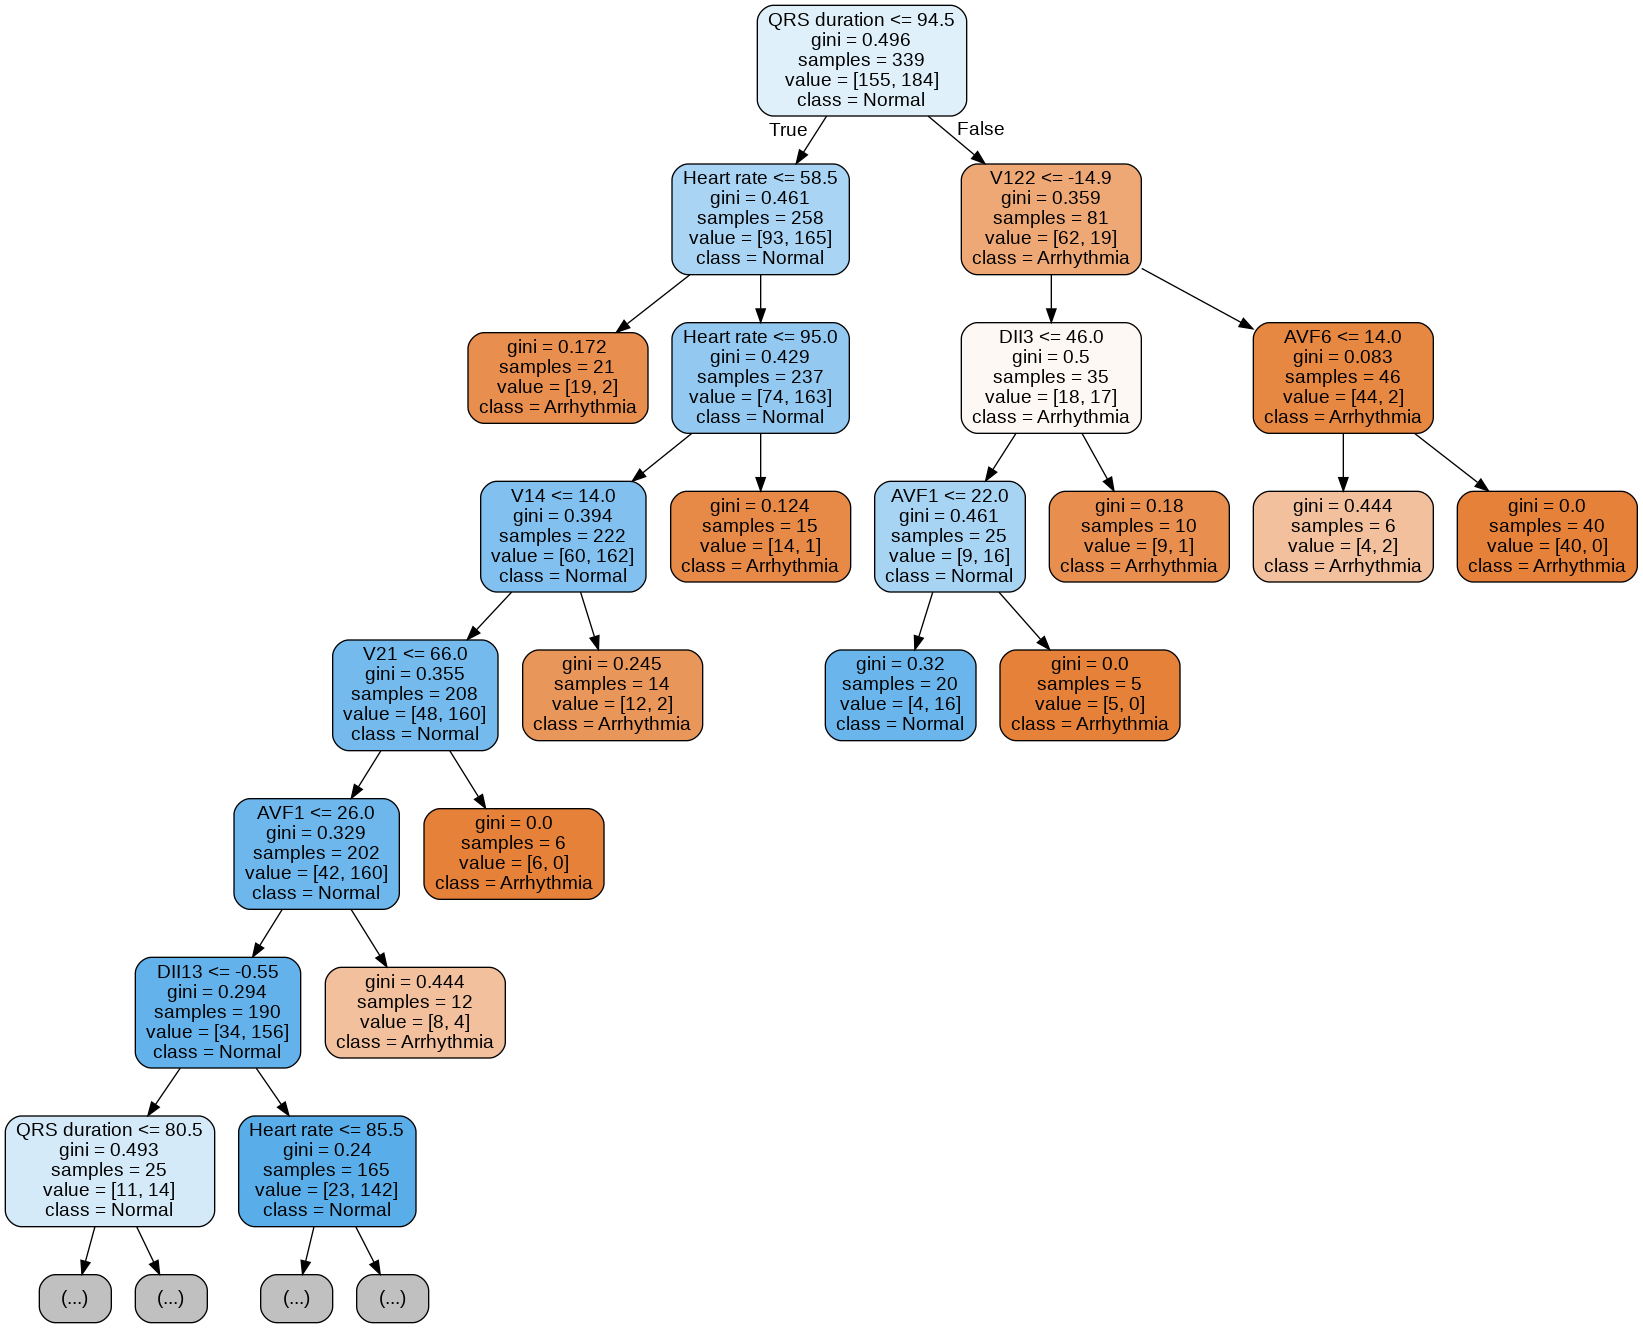

In [ ]:
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f3:
     f3 = tree.export_graphviz(clf3,
                              out_file=f3,
                              max_depth = 9,
                              impurity = True,
                              feature_names = list(data_7.drop(['Class'], axis=1)),
                              class_names = ['Arrhythmia', 'Normal'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

##Métrica de Exactitud en entrenamiento (train)

In [ ]:
acc_decision_tree = round(clf3.score(X_train3, Y_train3) * 100, 2)
print(acc_decision_tree,'%')

86.73 %


## Matriz de confusión del Árbol de Decisión en Entrenamiento



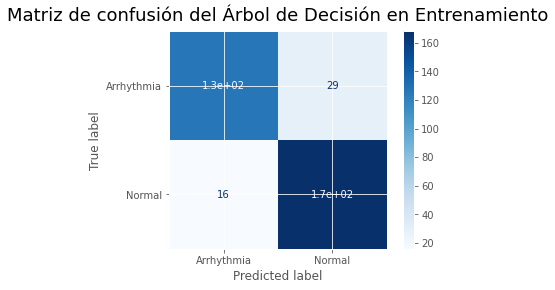

In [ ]:
disp = plot_confusion_matrix(clf3, X_train3, Y_train3,
                                 display_labels=['Arrhythmia', 'Normal'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol de Decisión en Entrenamiento', y=1.02, size=18)

plt.show()

##Métrica de Exactitud en Validación (test)



In [ ]:
acc_decision_tree = round(clf3.score(X_test3, Y_test3) * 100, 2)
print(acc_decision_tree,'%')

77.88 %


## Matriz de confusión del Árbol de Decisión en validacion



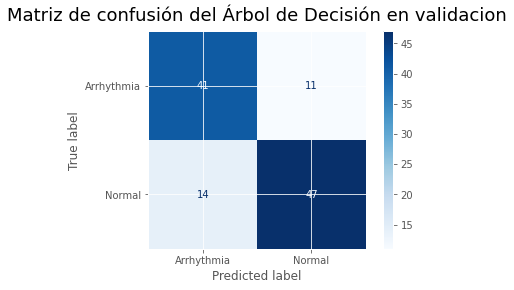

In [ ]:
disp = plot_confusion_matrix(clf3, X_test3, Y_test3,
                                 display_labels=['Arrhythmia', 'Normal'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol de Decisión en validacion', y=1.02, size=18)

plt.show()

Luego de los resultados anteriores podemos ver como, para el entrenamiento, donde la exactitud es de un 86.73% para el arbol, la matriz de confusion nos da que la efectividad fue de 86.96%, lo cual es relativamente alto. 
Para el caso de la validacion la exactitud es de 77.88%, y la matriz de confusion nos da 77.87% de efectividad al predecir los resultados.
En conclusion, la eficiencia del arbol en entrenamiento en validacion, nos dan unos porcentajes de aciertos bastante altos para una cantidad de registros tan limitada (452).

# Casos de uso


1.   Se tomo el registro numero 15 del dataset, escogido de manera aleatoria




In [ ]:
data.iloc[[15]][['QRS duration', 'Heart rate', 'V122','DII3', 'AVF6', 'V14', 'V21', 'AVF1', 'Class']]

,QRS duration,Heart rate,V122,DII3,AVF6,V14,V21,AVF1,Class
15,75,76.0,-21.8,28,24,0,0,0,1


Pasando por el arbol de clasificacion llegamos a que este predice que es una persona normal, un resultado falso negativo en la matriz de confusion.

2.   Se tomo el registro numero 140 del dataset, escogido de manera aleatoria

In [ ]:
data.iloc[[140]][['QRS duration', 'Heart rate', 'V122','DII3', 'AVF6', 'V14', 'V21', 'AVF1', 'Class']]

,QRS duration,Heart rate,V122,DII3,AVF6,V14,V21,AVF1,Class
140,81,75.0,-17.4,0,24,0,0,0,1


Pasando por el arbol de clasificacion llegamos a que este predice que es una persona normal, un resultado falso negativo en la matriz de confusion.

## Propuesta del modelo 3

Para este modelo se usaran las 87 variables iniciales (ya que es un modelo multiclass puede ser man sensible a cambios en las variables), pero no se tendran solo 2 targets sino 16, como se tenia planteado incialmente en el dataset, estos son:







       1             Normal				          
       2             Ischemic changes (Coronary Artery Disease)   
       3             Old Anterior Myocardial Infarction           
       4             Old Inferior Myocardial Infarction           
       5             Sinus tachycardy			           
       6             Sinus bradycardy			           
       7             Ventricular Premature Contraction (PVC)       
       8             Supraventricular Premature Contraction	    
       9             Left bundle branch block 		            
       10             Right bundle branch block		           
       11             1. degree AtrioVentricular block	            	
       12             2. degree AV block		            
       13             3. degree AV block		            
       14             Left ventricule hypertrophy 	            
       15             Atrial Fibrillation or Flutter	            
       16             Others				           



In [ ]:
data_6=data_4.copy()
data_6=data_6.drop(columns=dr)
data_6

,Age,Sex,QRS duration,P-R interval,Heart rate,Q wave,S wave,diphasic derivation of R wave,DII2,DII3,DII5,DII7,DII8,DII9,DII10,DII11,DII12,DIII1,DIII4,DIII5,DIII7,DIII8,DIII9,DIII10,DIII11,AVF1,AVF5,AVF6,AVF7,AVF8,AVF10,AVF11,AVF12,V14,V15,V17,V18,V19,V110,V111,...,V211,V212,V37,V38,V39,V311,V312,V42,V45,V47,V48,V411,V412,DIQ wave,DIR' wave,DIP wave,DII13,DII14,DII18,DIII13,DIII14,DIII15,DIII18,DIII19,DIII20,AVF17,AVF18,V114,V115,V116,V118,V122,V313,V318,V319,V415,V417,V418,V419,Class
0,75,0,91,193,63.0,0,44,0,44,20,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,48,0,56,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,52,0,0,0,0,0,0.0,0.0,0.6,0.0,0.0,0.0,0.1,-5.2,1.4,0.0,0.8,-0.6,0.0,0.0,-6.0,0.0,0.0,0.0,-29.7,-0.1,0.0,0.6,15.2,0.0,0.0,0.9,8
1,56,1,81,174,53.0,0,0,0,64,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,48,0,0,0,0,0,0.0,0.0,0.4,0.0,0.0,0.0,0.3,-1.6,0.9,0.0,-0.3,0.4,0.0,0.0,0.0,1.0,-8.8,0.0,-26.8,0.0,0.0,0.9,9.5,0.0,0.0,0.5,6
2,54,0,138,163,75.0,0,80,0,56,52,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,24,0,1,0,0,0,76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,44,0,0,0,0,0,0.0,0.0,0.3,0.8,-0.4,0.0,-0.2,-0.6,4.4,0.0,0.5,0.2,0.0,0.0,0.0,0.7,-3.8,0.0,-13.6,0.0,-0.5,0.4,10.0,0.0,0.0,0.5,10
3,55,0,100,202,71.0,0,20,0,64,36,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,56,0,0,0,0,0,0.0,0.0,1.1,0.1,0.0,0.0,-0.4,-0.4,1.6,0.0,-1.0,-0.9,0.0,0.0,-6.5,0.0,0.0,0.0,-22.4,0.7,0.0,0.1,15.0,0.0,0.0,0.1,1
4,75,0,88,181,74.5,0,40,0,40,24,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,48,0,0,0,0,0,0.0,0.0,0.9,0.1,0.0,0.0,0.2,-3.8,1.2,0.0,1.0,-0.6,0.0,0.0,-5.7,0.0,0.0,0.0,-30.0,-0.5,0.0,-1.0,15.2,0.0,0.0,-0.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,80,199,63.0,0,24,0,44,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,32,0,0,0,0,0,0.0,0.0,0.8,0.1,0.0,0.0,0.1,0.0,0.5,0.0,0.3,-0.4,0.0,0.0,-6.2,0.0,0.0,0.0,-19.7,1.0,0.0,-0.1,2.9,0.0,0.0,0.8,1
448,37,0,100,137,73.0,0,36,0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,64,0,0,0,0,0,0.0,0.0,0.7,0.8,0.0,0.0,0.7,0.0,7.8,0.0,0.3,1.6,0.0,0.0,-4.5,2.6,0.0,0.0,21.2,1.0,0.0,-0.3,22.5,0.9,0.0,0.7,10
449,36,0,108,176,84.0,16,40,0,40,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,44,28,0,0,0,0,0,...,0,0,0,0,0,0,0,52,0,0,0,0,0,-0.4,0.0,1.3,1.4,0.0,0.0,1.2,0.0,1.5,0.0,-2.8,-1.8,0.0,0.0,0.0,0.5,-1.4,-2.9,-0.9,-0.7,0.0,1.4,20.6,0.0,0.0,1.0,2
450,32,1,93,106,80.0,0,0,0,64,0,0,0,0,0,0,0,0,16,0,0,0,1,0,0,0,12,0,36,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,52,0,0,0,0,0,0.0,0.0,0.7,0.8,-0.5,0.0,1.2,-0.9,4.2,0.0,-1.1,0.2,0.0,0.0,0.0,2.2,-12.2,0.0,-16.3,2.2,0.0,0.9,11.9,0.0,0.0,0.6,1


In [ ]:
data_6.groupby('Class').size()

Class
1     245
2      44
3      15
4      15
5      13
6      25
7       3
8       2
9       9
10     50
14      4
15      5
16     22
dtype: int64

Se evidencia que las clases estan desbalanceadas y que varias de las planteadas al inicio no tienen representacion en la muestra las clases con valores de 2 y 3 ya que solo representan el 1% del dataset y pueden verse perdidas al momento de la particion de datos para el entrenamiento del modelo

In [ ]:
data_try=data_6[data_6['Class']==7]
data_try=data_try.append(data_6[data_6['Class']==8])
indices=list(data_try.index)
data_6=data_6.drop(
    labels=indices,
    axis=0,
)
data_6=data_6.reset_index(drop=True)

## Profundidad del árbol según número de atributos (variables)
Para escoger los hyperparametros se tuvo que cambiar manualmente cada uno de ellos y revisar con cuales el modelo conseguia una mayor precision. Si el numero de estos era muy bajo nos arriesgamos a tener un problema de overfitting en el cual el modelo se sobreajusta a los datos, y teniendo malos resultados al momento de predecir.

### Escoger n_splits
se refiere al número de grupos en los que se dividirá una muestra de datos determinada. Como tal, el procedimiento a menudo se denomina validación cruzada de k veces


Se evidencia el desbalance de las clases, lo que podria generar un modelo sesgado. Si medimos la efectividad de nuestro modelo por la cantidad de aciertos que tuvo, sólo teniendo en cuenta a la clase mayoritaria podemos estar teniendo una falsa sensación de que el modelo funciona bien.
Por ende, se deben usar nuevas maetricas ademas de la exactitud.


Debido al desbalance de las clases se usara StratifiedKFold ya que esta permite reorganizar los datos para garantizar que cada fold sea un buen representante del todo. 
Los folds se hacen conservando el porcentaje de muestras de cada clase.
Para este caso, para determinar el numero adecuado de folds se busca maximixar el promedio de precision, al hacerlo manualmente nos damos cuenta de que n_splits=4 es el numero optimo.

## Definir tamaño de datos de entrenamiento y datos de prueba

Al igual que los otros dos modelos es necesario definir que porcentaje de datos se destinan entre cada area, es importante tener en cuenta que no sean lo suficientemente pocos para que el modelo no se ajuste a el (underfitting) o lo suficientemente grandes para que el este modelo practicamente recuerde los datos que se le dan y se sobreajuste a estos (overfitting). En ambos casos las predicciones no serian del todo acertadas y por eso es necesario encontrar un balance en los porcentajes destinados a cada area, esto se hizo cambiando manualmente el tamaño de la variable test_size hasta que el puntaje de precision que se encuentra abajo se maximizara. Y de esta manera encontramos que el porcentaje correcto es 80% de los datos destinarlos a entrenamiento y el 20% restante para probrar nuestro modelo.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_6.loc[:, data_6.columns != 'Class'], data_6['Class'],test_size=0.2, random_state=0)

# Determinar numero de muestras por nodo y numero de muestras por cada hoja
Para verificar que los valores de min_samples_leaf y min_samples_plit son los que maximizan la precision del modelo, corremos el siguiente codigo para que se estime la precision con cada posible valor de estas dos variables

### Escoger min_samples_split
Es el número mínimo de muestras necesarias para dividir un nodo. Si este parámetro se establece en 20 y si un nodo incluye muestras de menos de 20, significa que este es el último nodo (lo que significa nodo terminal u hoja) y ya no se puede dividir.

In [ ]:
c_parameter_name = 'min_samples_split'
c_parameter_values = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = DecisionTreeClassifier(min_samples_split=input_parameter, random_state=21)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    acc_score = accuracy_score(Y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
    
print(df)


    min_samples_split   accuracy
0                 2.0  63.333333
1                 3.0  62.222222
2                 4.0  64.444444
3                 5.0  65.555556
4                 6.0  62.222222
5                 7.0  66.666667
6                 8.0  65.555556
7                 9.0  65.555556
8                10.0  65.555556
9                15.0  65.555556
10               20.0  65.555556
11               25.0  63.333333
12               30.0  66.666667
13               35.0  68.888889
14               40.0  68.888889
15               45.0  68.888889
16               50.0  68.888889
17               60.0  67.777778
18               70.0  67.777778
19               80.0  67.777778


Lo que nos arroja que el numero minimo de min_samples_split para alcanzar el maximo de precision es 35

# Escoger min_samples_leaf
El parámetro min_samples_leaf verifica antes de que se genere un nodo hoja, si la posible división del nodo padre da como resultado nodos hojas con este numero como minima cantidad de muestras, si no es asi no es posible hacer la division del nodo padre y este se convertira en un nodo hoja.

In [ ]:
c_parameter_name = 'min_samples_leaf'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,15]
c_best_parameter = 0
c_best_accuracy = 0
c_worst_parameter = 0
c_worst_accuracy = 100
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
for input_parameter in c_parameter_values:
    model = DecisionTreeClassifier(min_samples_leaf=input_parameter, random_state=21)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    acc_score = accuracy_score(Y_test,y_pred)*100
    
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
    
    if acc_score > c_best_accuracy:
        c_best_accuracy = acc_score
        c_best_parameter = input_parameter
        c_best_model = model
        
    if acc_score < c_worst_accuracy:
        c_worst_accuracy = acc_score
        c_worst_parameter = input_parameter
        c_worst_model = model
        
print(df)

    min_samples_leaf   accuracy
0                1.0  63.333333
1                2.0  65.555556
2                3.0  67.777778
3                4.0  70.000000
4                5.0  72.222222
5                6.0  71.111111
6                7.0  67.777778
7                8.0  71.111111
8                9.0  68.888889
9               10.0  70.000000
10              15.0  71.111111


Lo que nos arroja que cuando min_samples_leaf es igual a 5 la precision se maximiza

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

cv = StratifiedKFold(n_splits=4) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data_6))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='gini', #gini
                                             min_samples_split=35,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:1, 2:5.57, 3:16.33, 4:16.33, 5:18.85, 6:9.8, 9:27.2, 10:4.9, 14:61.25, 15:49, 16:11.14}) 
                                                                   
    for train_fold, valid_fold in cv.split(data_6.drop(['Class'], axis=1),data_6["Class"]):
        f_train = data_6.loc[train_fold] 
        f_valid = data_6.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['Class'], axis=1), 
                               y = f_train["Class"]) 
        #prediction = model.predict(f_valid.drop(['Class'], axis=1)
        #valid_acc =  f1_score(f_valid["Class"], prediction)
        valid_acc = model.score(X = f_valid.drop(['Class'], axis=1), 
                                y = f_valid["Class"]) # calculamos la exactitud con el segmento de validacion
                      
        #fold_accuracy.append(valid_acc)
        prediction = model.predict(f_valid.drop(['Class'], axis=1))
        otro=  f1_score(f_valid["Class"], prediction, average='macro')#micro, macro o weighted
        fold_accuracy.append(otro)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average F1-score": accuracies})
dataframe = dataframe[["Max Depth", "Average F1-score"]]
print(dataframe.to_string(index=False))

 Max Depth  Average F1-score
         1          0.072597
         2          0.125845
         3          0.190630
         4          0.222341
         5          0.283044
         6          0.329171
         7          0.391093
         8          0.423350
         9          0.457438
        10          0.453723
        11          0.452526
        12          0.445569
        13          0.443086
        14          0.446195
        15          0.446195
        16          0.446195
        17          0.446162
        18          0.446195
        19          0.446195
        20          0.446162
        21          0.446162
        22          0.446195
        23          0.446195
        24          0.446195
        25          0.446162
        26          0.446195
        27          0.446162
        28          0.446195
        29          0.446195
        30          0.446162
        31          0.446162
        32          0.446195
        33          0.446162
        34    

Para verificar la profundida de uso en lugar de la exactitud el f1-score ya que La exactitud se puede utilizar cuando la distribución de clases es similar, mientras que la puntuación F1 es una mejor métrica cuando hay clases desequilibradas como en el caso anterior.
En la mayoría de los problemas de clasificación de la vida real, existe una distribución de clases desequilibrada y, por lo tanto, la puntuación F1 es una mejor métrica para evaluar nuestro modelo.

In [ ]:
clf = DecisionTreeClassifier(max_depth = 9,min_samples_split=35,min_samples_leaf=5,
                             random_state = 0)

In [ ]:

clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=35,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
score = clf.score(X_test, Y_test)
print(score)

0.7111111111111111


In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
4,Heart rate,0.2777
33,V14,0.2124
41,V21,0.1324
25,AVF1,0.1305
2,QRS duration,0.1077
...,...,...
28,AVF7,0.0000
27,AVF6,0.0000
26,AVF5,0.0000
24,DIII11,0.0000


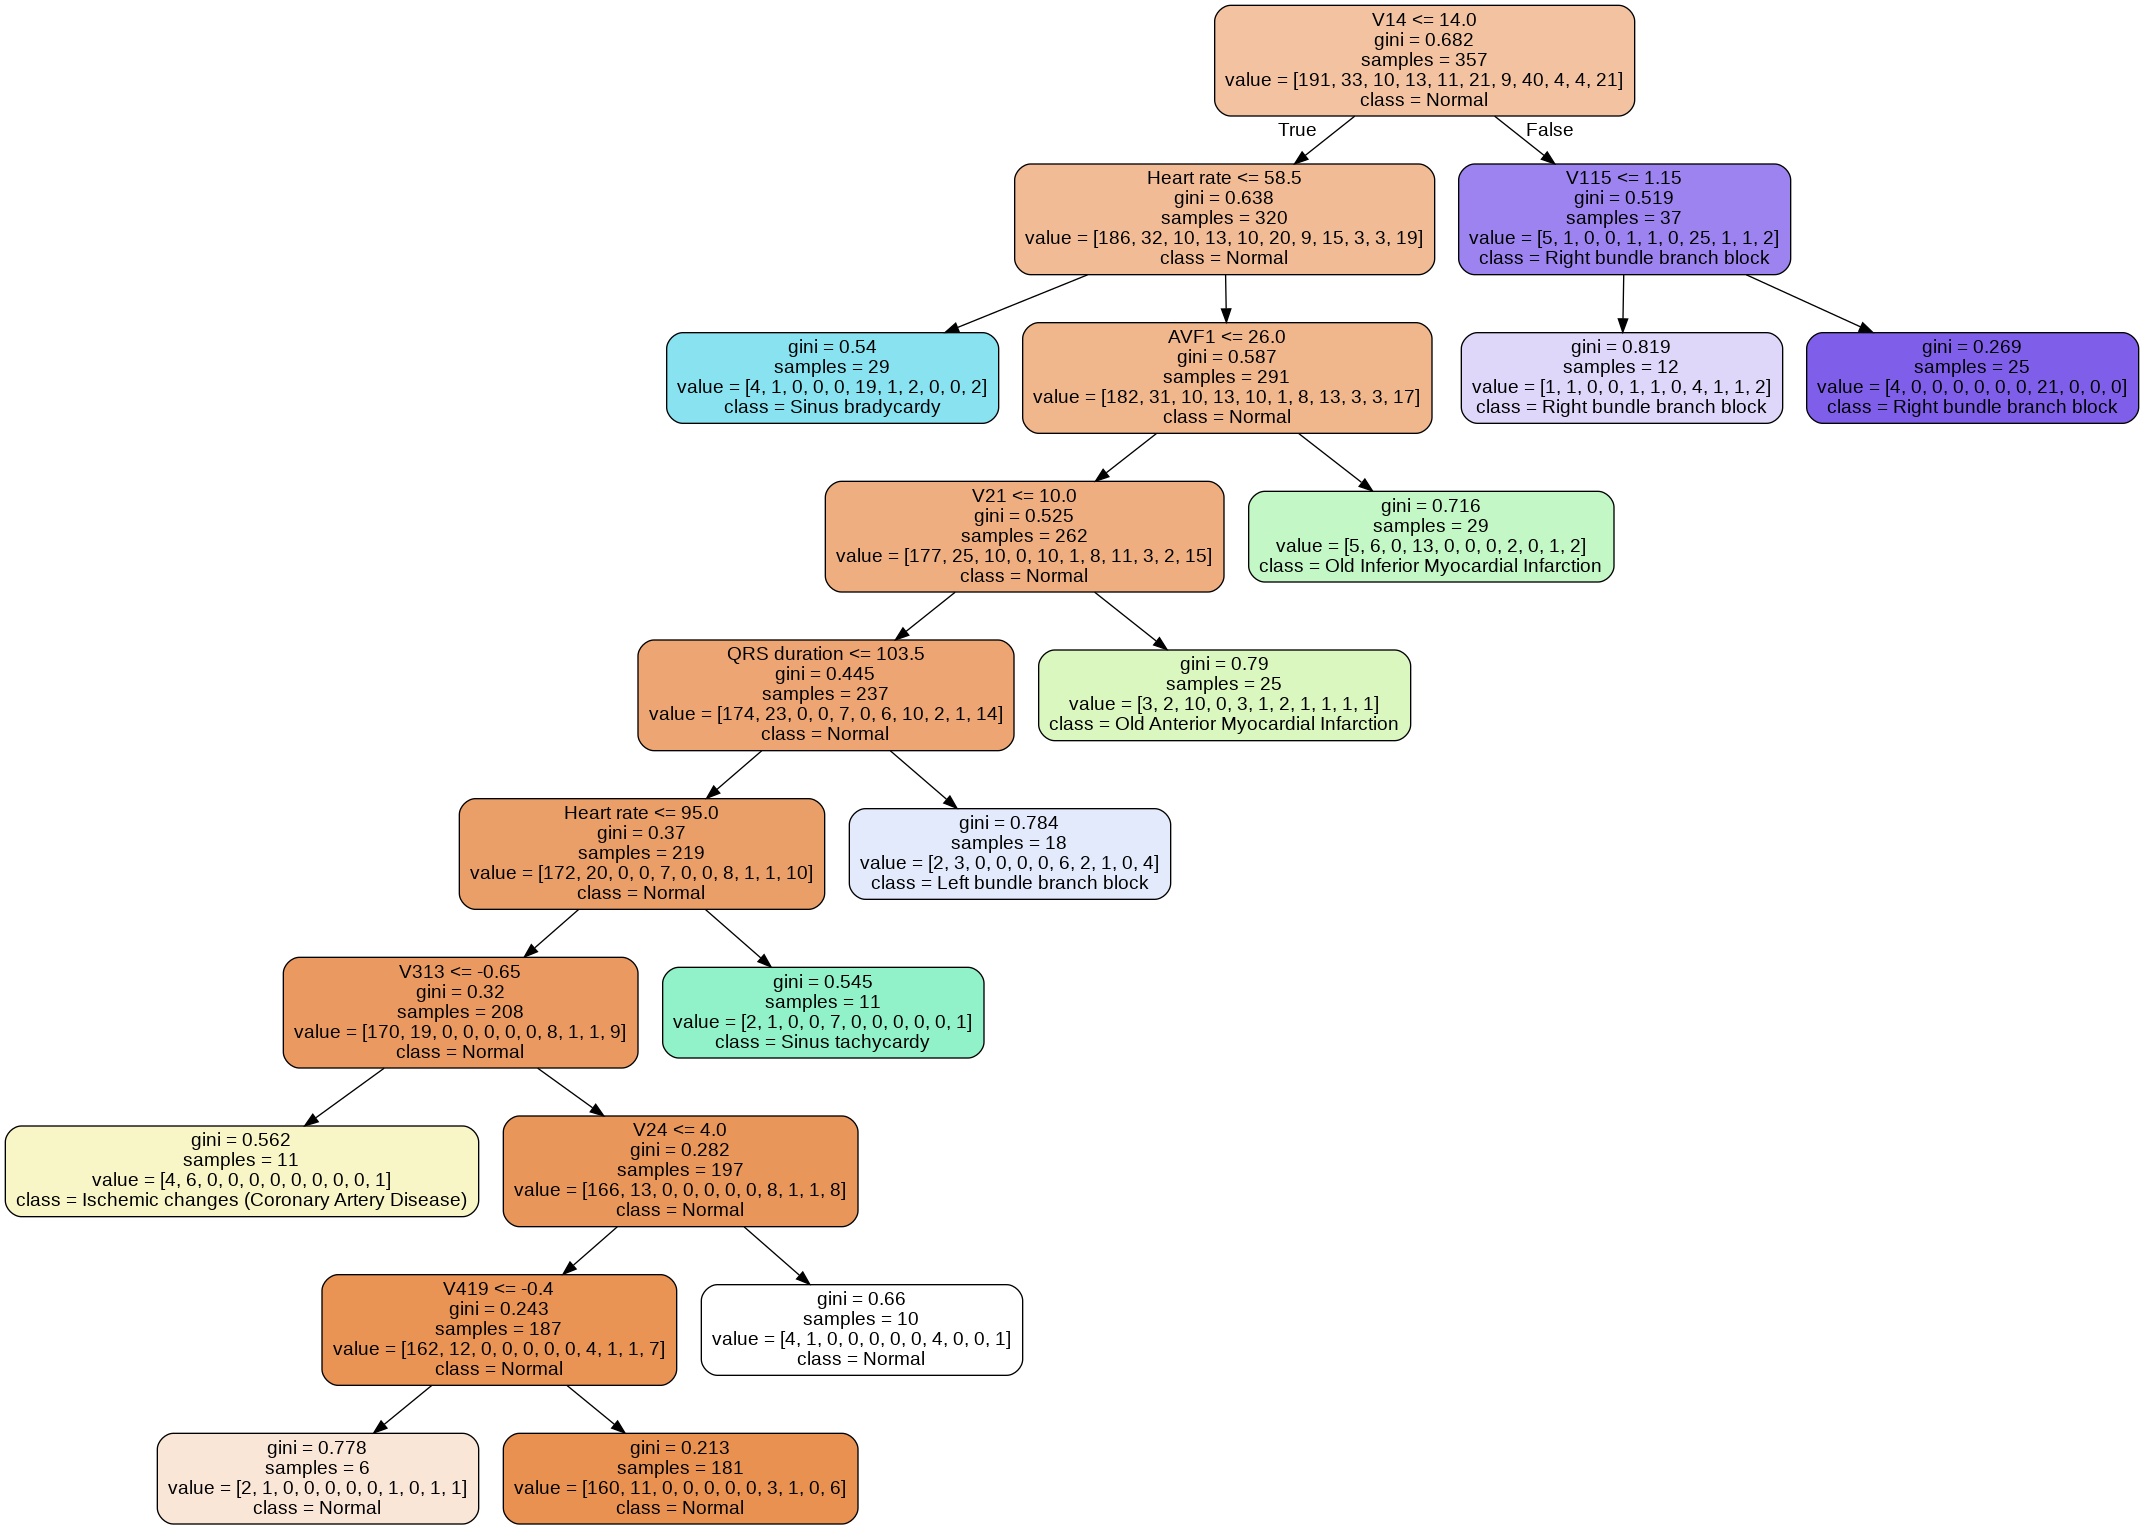

In [ ]:
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 9,
                              impurity = True,
                              feature_names = list(data_6.drop(['Class'], axis=1)),
                              class_names = ['Normal', 'Ischemic changes (Coronary Artery Disease)', 'Old Anterior Myocardial Infarction', 'Old Inferior Myocardial Infarction', 'Sinus tachycardy', 'Sinus bradycardy', 'Left bundle branch block', 
                                             'Right bundle branch block', 'Left ventricule hypertrophy', 'Atrial Fibrillation or Flutter', 'Others'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

##Métrica de Exactitud en entrenamiento (train)

In [ ]:
acc_decision_tree = round(clf.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree,'%')

70.59 %


## Matriz de confusión del Árbol de Decisión en Entrenamiento'

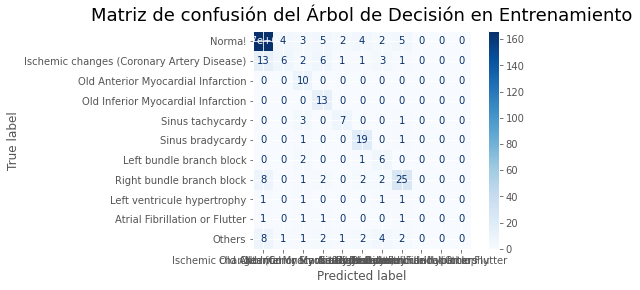

In [ ]:
disp = plot_confusion_matrix(clf, X_train, Y_train,
                                 display_labels=['Normal', 'Ischemic changes (Coronary Artery Disease)', 'Old Anterior Myocardial Infarction', 'Old Inferior Myocardial Infarction', 'Sinus tachycardy', 'Sinus bradycardy', 'Left bundle branch block', 
                                             'Right bundle branch block', 'Left ventricule hypertrophy', 'Atrial Fibrillation or Flutter', 'Others'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol de Decisión en Entrenamiento', y=1.02, size=18)

plt.show()

Esta matriz tiene muchos valores por lo que se dificulta su interpretación, por tanto se planteara una tabla con los valores de precision, recall y f1-score de cada clase

In [ ]:
confusion_matrix= confusion_matrix(Y_train, clf.predict(X_train))
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
info={'TP':TP,'FN':FN,'FP':FP,"TN":TN}
info=pd.DataFrame(info)
metric={'Class':[],'Precision':[],'Recall':[],'F1-score':[]}
metric=pd.DataFrame(metric)
names=['Normal', 'Ischemic changes (Coronary Artery Disease)', 'Old Anterior Myocardial Infarction', 'Old Inferior Myocardial Infarction', 'Sinus tachycardy', 'Sinus bradycardy', 'Left bundle branch block', 
                                             'Right bundle branch block', 'Left ventricule hypertrophy', 'Atrial Fibrillation or Flutter', 'Others']

for i in range(len(confusion_matrix)):
  precision = round((info['TP'][i])/((info['TP'][i])+(info['FP'][i])),3)
  recall= round((info['TP'][i])/((info['TP'][i])+(info['FN'][i])),3)
  F1=round(2 * (precision * recall) / (precision + recall),3)
  metric.loc[i] = [names[i],precision,recall,F1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


In [ ]:
metric

,Class,Precision,Recall,F1-score
0,Normal,0.843,0.869,0.856
1,Ischemic changes (Coronary Artery Disease),0.545,0.182,0.273
2,Old Anterior Myocardial Infarction,0.400,1.000,0.571
3,Old Inferior Myocardial Infarction,0.448,1.000,0.619
4,Sinus tachycardy,0.636,0.636,0.636
5,Sinus bradycardy,0.655,0.905,0.760
6,Left bundle branch block,0.333,0.667,0.444
7,Right bundle branch block,0.676,0.625,0.650
8,Left ventricule hypertrophy,NaN,0.000,NaN
9,Atrial Fibrillation or Flutter,NaN,0.000,NaN


Esta tabla permite visualizar mejor cual es la precision, recall y f1-score del modelo para predecir cada clase.
Nota: las clases que tienen como resultado NaN es por que contaban una division con 0 

##Métrica de Exactitud en Validación (test)



In [ ]:
acc_decision_tree = round(clf.score(X_test, Y_test) * 100, 2)
print(acc_decision_tree,'%')

71.11 %


## Matriz de confusión del Árbol de Decisión en validacion

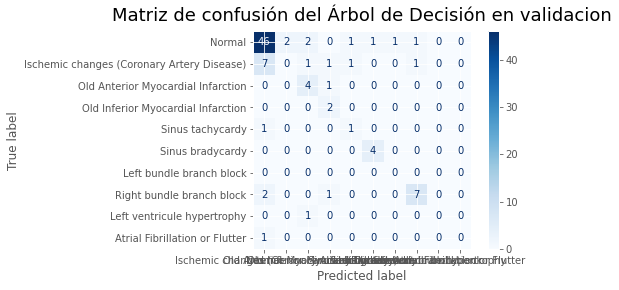

In [ ]:
disp = plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=['Normal', 'Ischemic changes (Coronary Artery Disease)', 'Old Anterior Myocardial Infarction', 'Old Inferior Myocardial Infarction', 'Sinus tachycardy', 'Sinus bradycardy', 'Left bundle branch block', 
                                             'Right bundle branch block', 'Left ventricule hypertrophy', 'Atrial Fibrillation or Flutter', 'Others'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol de Decisión en validacion', y=1.02, size=18)

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix2= confusion_matrix(Y_test, clf.predict(X_test))


In [ ]:


FP = confusion_matrix2.sum(axis=0) - np.diag(confusion_matrix2)  
FN = confusion_matrix2.sum(axis=1) - np.diag(confusion_matrix2)
TP = np.diag(confusion_matrix2)
TN = confusion_matrix2.sum() - (FP + FN + TP)
info={'TP':TP,'FN':FN,'FP':FP,"TN":TN}
info=pd.DataFrame(info)
metric={'Class':[],'Precision':[],'Recall':[],'F1-score':[]}
metric=pd.DataFrame(metric)
names=['Normal', 'Ischemic changes (Coronary Artery Disease)', 'Old Anterior Myocardial Infarction', 'Old Inferior Myocardial Infarction', 'Sinus tachycardy', 'Sinus bradycardy', 'Left bundle branch block', 
                                             'Right bundle branch block', 'Left ventricule hypertrophy', 'Atrial Fibrillation or Flutter', 'Others']

for i in range(len(confusion_matrix2)):
  precision = round((info['TP'][i])/((info['TP'][i])+(info['FP'][i])),3)
  recall= round((info['TP'][i])/((info['TP'][i])+(info['FN'][i])),3)
  F1=round(2 * (precision * recall) / (precision + recall),3)
  metric.loc[i] = [names[i],precision,recall,F1]

In [ ]:
metric

,Class,Precision,Recall,F1-score
0,Normal,0.807,0.852,0.829
1,Ischemic changes (Coronary Artery Disease),0.000,0.000,NaN
2,Old Anterior Myocardial Infarction,0.500,0.800,0.615
3,Old Inferior Myocardial Infarction,0.400,1.000,0.571
4,Sinus tachycardy,0.333,0.500,0.400
5,Sinus bradycardy,0.800,1.000,0.889
6,Left bundle branch block,0.000,NaN,NaN
7,Right bundle branch block,0.778,0.700,0.737
8,Left ventricule hypertrophy,NaN,0.000,NaN
9,Atrial Fibrillation or Flutter,NaN,0.000,NaN


# Casos de uso

1.   Se tomo el registro numero 445 del dataset, escogido de manera aleatorio



In [ ]:
data.iloc[[445]][['QRS duration', 'Heart rate', 'V115','V313', 'V24', 'V14', 'V21', 'AVF1', 'V419', 'Class']]

,QRS duration,Heart rate,V115,V313,V24,V14,V21,AVF1,V419,Class
445,91,70.0,1.8,0.8,0,0,0,0,-0.9,1


Pasando por el arbol de clasificacion llegamos a que se predice un valor normal para ese registro, algo que es cierto

2.   Se tomo el registro numero 344 del dataset, escogido de manera aleatorio

In [ ]:
data.iloc[[344]][['QRS duration', 'Heart rate', 'V115','V313', 'V24', 'V14', 'V21', 'AVF1', 'V419', 'Class']]

,QRS duration,Heart rate,V115,V313,V24,V14,V21,AVF1,V419,Class
344,90,72.0,1.8,1.1,44,44,0,0,0.6,10


Pasando por el arbol de clasificacion llegamos a que se predice un valor de Right bundle branch block (Class 10) para ese registro, algo que es cierto

# Conclusion de Arboles de Decisión
El arbol de decision que presenta superioridad frente a los demas en terminos de exactitud en sus resultados, teniendo en cuenta que en el tercer modelo se basa en la precision, es el segundo modelo.

Debido al uso de `SelectKBest` que limito las variables tomadas como decisivas produjo un arbol con igual exactitud que el primer modelo, pero viendo la exactitud y las matrices de confusion de estos 2 modelos, se encontro que el segundo tenia una mayor precision en la etapa de entrenamiento. Por lo tanto, se decidio que el segundo modelo es mejor que el primero.

Con respecto al tercer modelo, se encontraron algunos problemas en tanto a numero de registros representantes de algunas de las clases presentes, lo cual condujo al uso de pesos diferentes para cada clase, pero sigue siendo algo que no permite una buena captura de los diferentes factores decisivos para ese tipo de arritmias, este modelo obtuvo una esperada baja en la precision frente a la exactitud de los otros 2 modelos.

# Clasificación Bayesiana


Para una correcta implemetacion de la Clasificacion bayesiana se deben hacer dos supuestos:

- Suponemos que las características de verosimilitud (los atributos)
no están correlacionadas entre sí. Esto se comprobo con las graficas de correlacion de pearson en la parte superior.

- Suponemos que el valor de las características tendrá una distribución normal
(gaussiana). Esto se trata de verificar mas adelante, despues de seleccionar las variables con las que se va a trabajar


A continuacion se realiza el clasificador Gaussian Naive Bayes,tanto para el dataset del modelo 1 y 2(que son el mismo solo que con menos variables) y para el modelo 3 que define cada tipo de arritmia de manera individual. Para ambos casos se dividio el dataset en 80% entrenamiento y 20% prueba

Tambien se intento quitar la mayoria de variables para maximixar los resultados de precision, para esto se utilizo la clase de Sklearn llamada SelectKBest con la que se seleccionan las mejroes k variables,para definir el numero de variables a filtrar se modifico esta cantidad de variables manualmente hasta encontrar el numero optimo en el que los resultados fueran mejores. Para el caso del modelo 1 y 2 se encontro que con 14 variables los resultados quedaban en su maximo, y para el modelo 3 con 30 variables en total.

# Modelo 1 y 2

In [ ]:
data_5=data_4.copy()
data_5=data_5.drop(columns=dr)
data_5

,Age,Sex,QRS duration,P-R interval,Heart rate,Q wave,S wave,diphasic derivation of R wave,DII2,DII3,DII5,DII7,DII8,DII9,DII10,DII11,DII12,DIII1,DIII4,DIII5,DIII7,DIII8,DIII9,DIII10,DIII11,AVF1,AVF5,AVF6,AVF7,AVF8,AVF10,AVF11,AVF12,V14,V15,V17,V18,V19,V110,V111,...,V211,V212,V37,V38,V39,V311,V312,V42,V45,V47,V48,V411,V412,DIQ wave,DIR' wave,DIP wave,DII13,DII14,DII18,DIII13,DIII14,DIII15,DIII18,DIII19,DIII20,AVF17,AVF18,V114,V115,V116,V118,V122,V313,V318,V319,V415,V417,V418,V419,Class
0,75,0,91,193,63.0,0,44,0,44,20,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,48,0,56,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,52,0,0,0,0,0,0.0,0.0,0.6,0.0,0.0,0.0,0.1,-5.2,1.4,0.0,0.8,-0.6,0.0,0.0,-6.0,0.0,0.0,0.0,-29.7,-0.1,0.0,0.6,15.2,0.0,0.0,0.9,8
1,56,1,81,174,53.0,0,0,0,64,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,48,0,0,0,0,0,0.0,0.0,0.4,0.0,0.0,0.0,0.3,-1.6,0.9,0.0,-0.3,0.4,0.0,0.0,0.0,1.0,-8.8,0.0,-26.8,0.0,0.0,0.9,9.5,0.0,0.0,0.5,6
2,54,0,138,163,75.0,0,80,0,56,52,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,24,0,1,0,0,0,76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,44,0,0,0,0,0,0.0,0.0,0.3,0.8,-0.4,0.0,-0.2,-0.6,4.4,0.0,0.5,0.2,0.0,0.0,0.0,0.7,-3.8,0.0,-13.6,0.0,-0.5,0.4,10.0,0.0,0.0,0.5,10
3,55,0,100,202,71.0,0,20,0,64,36,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,56,0,0,0,0,0,0.0,0.0,1.1,0.1,0.0,0.0,-0.4,-0.4,1.6,0.0,-1.0,-0.9,0.0,0.0,-6.5,0.0,0.0,0.0,-22.4,0.7,0.0,0.1,15.0,0.0,0.0,0.1,1
4,75,0,88,181,74.5,0,40,0,40,24,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,48,0,0,0,0,0,0.0,0.0,0.9,0.1,0.0,0.0,0.2,-3.8,1.2,0.0,1.0,-0.6,0.0,0.0,-5.7,0.0,0.0,0.0,-30.0,-0.5,0.0,-1.0,15.2,0.0,0.0,-0.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,80,199,63.0,0,24,0,44,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,32,0,0,0,0,0,0.0,0.0,0.8,0.1,0.0,0.0,0.1,0.0,0.5,0.0,0.3,-0.4,0.0,0.0,-6.2,0.0,0.0,0.0,-19.7,1.0,0.0,-0.1,2.9,0.0,0.0,0.8,1
448,37,0,100,137,73.0,0,36,0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,64,0,0,0,0,0,0.0,0.0,0.7,0.8,0.0,0.0,0.7,0.0,7.8,0.0,0.3,1.6,0.0,0.0,-4.5,2.6,0.0,0.0,21.2,1.0,0.0,-0.3,22.5,0.9,0.0,0.7,10
449,36,0,108,176,84.0,16,40,0,40,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,44,28,0,0,0,0,0,...,0,0,0,0,0,0,0,52,0,0,0,0,0,-0.4,0.0,1.3,1.4,0.0,0.0,1.2,0.0,1.5,0.0,-2.8,-1.8,0.0,0.0,0.0,0.5,-1.4,-2.9,-0.9,-0.7,0.0,1.4,20.6,0.0,0.0,1.0,2
450,32,1,93,106,80.0,0,0,0,64,0,0,0,0,0,0,0,0,16,0,0,0,1,0,0,0,12,0,36,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,52,0,0,0,0,0,0.0,0.0,0.7,0.8,-0.5,0.0,1.2,-0.9,4.2,0.0,-1.1,0.2,0.0,0.0,0.0,2.2,-12.2,0.0,-16.3,2.2,0.0,0.9,11.9,0.0,0.0,0.6,1


In [ ]:
for i in data_5.index:
  if data_5.at[i, "Class"] != 1:
    data_5.at[i, "Class"] = 0

data_5['Class']

0      0
1      0
2      0
3      1
4      0
      ..
447    1
448    0
449    0
450    1
451    1
Name: Class, Length: 452, dtype: int64

In [ ]:
X=data_5.drop(['Class'], axis=1)
y=data_5['Class']

# Distribuimos 80% para el entrenamiento y 20% para el testeo.

X_train, X_test = train_test_split(data_5, test_size=0.2, random_state=6) 
y_train =X_train["Class"]
y_test = X_test["Class"]

best=SelectKBest(k=14)
best.fit_transform(X, y)
selected = best.get_support(indices=True)
print(X.columns[selected])
used_features =X.columns[selected]

Index(['Sex', 'QRS duration', 'S wave', 'DII3', 'AVF1', 'AVF6', 'V14', 'V18',
       'V21', 'V24', 'DII14', 'DIII14', 'V115', 'V122'],
      dtype='object')


In [ ]:
indices=list(used_features) #creo un dataframe con los datos que no van
data_9=data_5.drop(
    labels=indices,
    axis=1,
)

In [ ]:
indices=list(data_9.columns) #creo el dataframe definitivo quitandole las variables del data_9
data_10=data_5.drop(
    labels=indices,
    axis=1,
)

### Distribucion de las mejores variables para el metodo 1 y 2

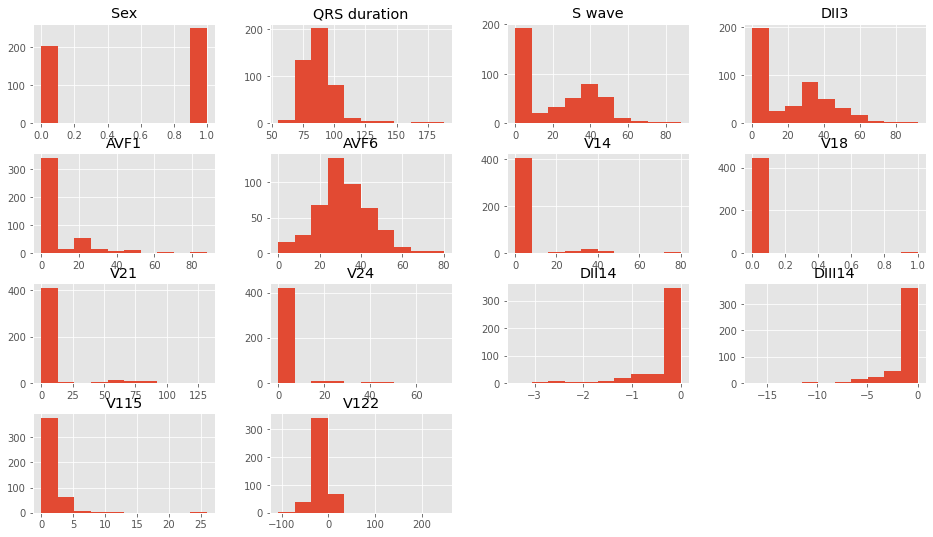

In [ ]:
data_10.hist()
plt.show()

Como se puede observar en la grafica de las variables seleccionadas, se puede concluir que los datos no se distribuyen exactamente normales... Sin embargo, las suposiciones que hay que se tienen que tomar en cuenta para ejecutar el  algoritmo de Gaussian Naive Bayes Classificator son:
 - Gausiana : Se asume que las variables cuentan con una distribución normal, para poder calcular la probabilidad P(B|A) usando la función de densidad de probabilidad normal
 - Ingenua : Asumimos que las variables no están correlacionadas entre sí, cosa que no siempre se cumple 



In [ ]:

# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])
 
print('Accuracy in training set: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Accuracy in test set: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Accuracy in training set: 0.76
Accuracy in test set: 0.76


### Conclusion

Cuando comparamos la precision de los arboles tanto para el metodo 1 (con 86 variables) y con el metodo 2 (con solo 40 variables), podemos observar que estos cuentan con un poco mas de 80% de precision. Que al compararlos con los resultados que nos arroja el metodo de clasificacion bayesiana no existe una gran diferencia, teniendo en cuenta que es el mismo database, que es con tan solo 14 variables y que estas en su mayoria no cumplen con los criterios que se suponen de distribucion normal y sin correlaciones. 

# Modelo 3

In [ ]:
data_6=data_4.copy()
data_6=data_6.drop(columns=dr)
data_6

,Age,Sex,QRS duration,P-R interval,Heart rate,Q wave,S wave,diphasic derivation of R wave,DII2,DII3,DII5,DII7,DII8,DII9,DII10,DII11,DII12,DIII1,DIII4,DIII5,DIII7,DIII8,DIII9,DIII10,DIII11,AVF1,AVF5,AVF6,AVF7,AVF8,AVF10,AVF11,AVF12,V14,V15,V17,V18,V19,V110,V111,...,V211,V212,V37,V38,V39,V311,V312,V42,V45,V47,V48,V411,V412,DIQ wave,DIR' wave,DIP wave,DII13,DII14,DII18,DIII13,DIII14,DIII15,DIII18,DIII19,DIII20,AVF17,AVF18,V114,V115,V116,V118,V122,V313,V318,V319,V415,V417,V418,V419,Class
0,75,0,91,193,63.0,0,44,0,44,20,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,48,0,56,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,52,0,0,0,0,0,0.0,0.0,0.6,0.0,0.0,0.0,0.1,-5.2,1.4,0.0,0.8,-0.6,0.0,0.0,-6.0,0.0,0.0,0.0,-29.7,-0.1,0.0,0.6,15.2,0.0,0.0,0.9,8
1,56,1,81,174,53.0,0,0,0,64,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,48,0,0,0,0,0,0.0,0.0,0.4,0.0,0.0,0.0,0.3,-1.6,0.9,0.0,-0.3,0.4,0.0,0.0,0.0,1.0,-8.8,0.0,-26.8,0.0,0.0,0.9,9.5,0.0,0.0,0.5,6
2,54,0,138,163,75.0,0,80,0,56,52,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,24,0,1,0,0,0,76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,44,0,0,0,0,0,0.0,0.0,0.3,0.8,-0.4,0.0,-0.2,-0.6,4.4,0.0,0.5,0.2,0.0,0.0,0.0,0.7,-3.8,0.0,-13.6,0.0,-0.5,0.4,10.0,0.0,0.0,0.5,10
3,55,0,100,202,71.0,0,20,0,64,36,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,56,0,0,0,0,0,0.0,0.0,1.1,0.1,0.0,0.0,-0.4,-0.4,1.6,0.0,-1.0,-0.9,0.0,0.0,-6.5,0.0,0.0,0.0,-22.4,0.7,0.0,0.1,15.0,0.0,0.0,0.1,1
4,75,0,88,181,74.5,0,40,0,40,24,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,48,0,0,0,0,0,0.0,0.0,0.9,0.1,0.0,0.0,0.2,-3.8,1.2,0.0,1.0,-0.6,0.0,0.0,-5.7,0.0,0.0,0.0,-30.0,-0.5,0.0,-1.0,15.2,0.0,0.0,-0.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,80,199,63.0,0,24,0,44,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,32,0,0,0,0,0,0.0,0.0,0.8,0.1,0.0,0.0,0.1,0.0,0.5,0.0,0.3,-0.4,0.0,0.0,-6.2,0.0,0.0,0.0,-19.7,1.0,0.0,-0.1,2.9,0.0,0.0,0.8,1
448,37,0,100,137,73.0,0,36,0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,64,0,0,0,0,0,0.0,0.0,0.7,0.8,0.0,0.0,0.7,0.0,7.8,0.0,0.3,1.6,0.0,0.0,-4.5,2.6,0.0,0.0,21.2,1.0,0.0,-0.3,22.5,0.9,0.0,0.7,10
449,36,0,108,176,84.0,16,40,0,40,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,44,28,0,0,0,0,0,...,0,0,0,0,0,0,0,52,0,0,0,0,0,-0.4,0.0,1.3,1.4,0.0,0.0,1.2,0.0,1.5,0.0,-2.8,-1.8,0.0,0.0,0.0,0.5,-1.4,-2.9,-0.9,-0.7,0.0,1.4,20.6,0.0,0.0,1.0,2
450,32,1,93,106,80.0,0,0,0,64,0,0,0,0,0,0,0,0,16,0,0,0,1,0,0,0,12,0,36,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,52,0,0,0,0,0,0.0,0.0,0.7,0.8,-0.5,0.0,1.2,-0.9,4.2,0.0,-1.1,0.2,0.0,0.0,0.0,2.2,-12.2,0.0,-16.3,2.2,0.0,0.9,11.9,0.0,0.0,0.6,1


In [ ]:
data_try=data_6[data_6['Class']==7]
data_try=data_try.append(data_6[data_6['Class']==8])
indices=list(data_try.index)
data_6=data_6.drop(
    labels=indices,
    axis=0,
)
data_6=data_6.reset_index(drop=True)

In [ ]:

X=data_6.drop(['Class'], axis=1)
y=data_6['Class']

# Distribuimos 80% para el entrenamiento y 20% para el testeo.

X_train, X_test = train_test_split(data_6, test_size=0.2, random_state=6) 
y_train =X_train["Class"]
y_test = X_test["Class"]

best=SelectKBest(k=31)
best.fit_transform(X, y)
selected = best.get_support(indices=True)
print(X.columns[selected])
used_features =X.columns[selected]

Index(['Age', 'Sex', 'QRS duration', 'P-R interval', 'Heart rate', 'S wave',
       'DII2', 'DII3', 'DIII1', 'AVF1', 'AVF6', 'AVF12', 'V14', 'V17', 'V18',
       'V21', 'V24', 'V26', 'V29', 'V39', 'V312', 'V42', 'V47', 'DII13',
       'DII14', 'DIII13', 'DIII14', 'V114', 'V115', 'V313', 'V415'],
      dtype='object')


In [ ]:
indices=list(used_features) #creo un dataframe con los datos que no van
data_7=data_6.drop(
    labels=indices,
    axis=1,
)

In [ ]:
indices=list(data_7.columns) #creo el dataframe definitivo quitandole las variables del data_7
data_8=data_6.drop(
    labels=indices,
    axis=1,
)

### Distribucion de las mejores variables para el metodo 3

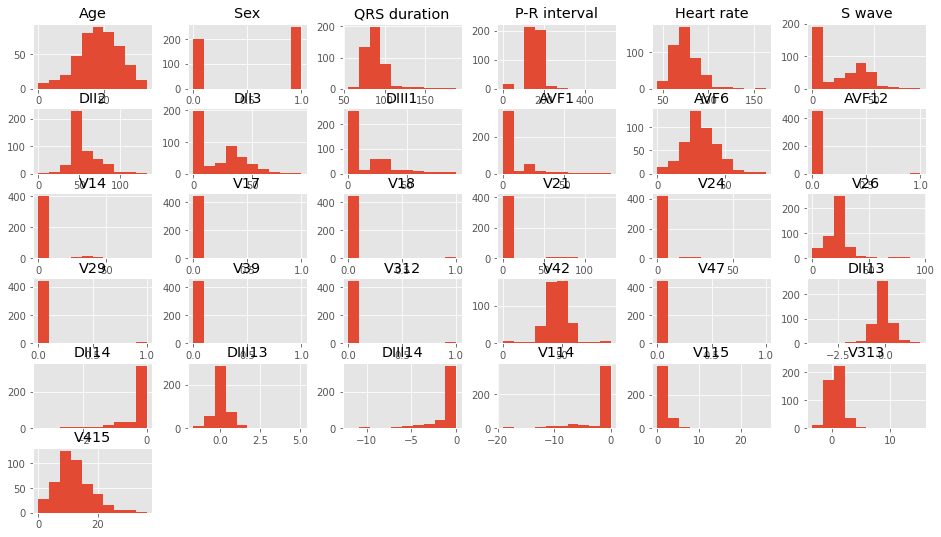

In [ ]:
data_8.hist()
plt.show()

Como se puede observar en la grafica de las variables seleccionadas, se puede concluir que los datos no se distribuyen exactamente normales... Sin embargo, las suposiciones que hay que se tienen que tomar en cuenta para ejecutar el  algoritmo de Gaussian Naive Bayes Classificator son:
 - Gausiana : Se asume que las variables cuentan con una distribución normal, para poder calcular la probabilidad P(B|A) usando la función de densidad de probabilidad normal
 - Ingenua : Asumimos que las variables no están correlacionadas entre sí, cosa que no siempre se cumple
 
Se puede observar que las unicas variables que muestran distribuciones ligeramente parecidas a la normal son "Age", "AVF6", y "V415"

In [ ]:


# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])
 
print('Accuracy in training set: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Accuracy in test set: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Accuracy in training set: 0.53
Accuracy in test set: 0.38


###Conclusion 

Cuando comparamos la efectividad del metodo 3 , que a diferencia del metodo 1 y 2 , donde se clasificaban los outputs con arritmia o normal, en este metodo se trata de predecir el tipo de arritmia especifica de cada paciente, lo que nos lleva a 16 posibles outputs. Teniendo esto en cuenta el arbol de decision nos arrojo una precision de alrededor de 70%, que si la comparamos con la precision del metodo de clasificacion bayesiana, nos damos cuenta que si existe una diferencia bastante grande. Esto probablemente debido a que las variables en su inmensa mayoria no cumplen con los criterios que se suponen de distribucion normal, ni de correlacion.